# E-Commerce: Identificação de perfis de consumidores

# Introdução

Neste projeto, aprofundaremos nossa análise de dados do e-commerce Everything Plus, com o intuito de identificar e segmentar os perfis dos consumidores. Essa segmentação permitirá que a empresa crie estratégias de marketing mais assertivas e personalize suas ofertas, garantindo uma experiência de compra melhorada e potencialmente aumentando as vendas.

**Etapas do projeto:**

**Passo 1: Preparação dos Dados**
- Carregaremos os dados do arquivo `ecommerce_dataset_us.csv` e os armazenaremos em uma variável apropriada.
- Otimizaremos o conjunto de dados para análise, assegurando a integridade e correção das informações.

**Caminho do arquivo:**  
- /datasets/ecommerce_dataset_us.csv

**Passo 2: Análise Exploratória de Dados**
- Investigaremos a distribuição de compras, frequência dos produtos mais vendidos e os padrões de comportamento dos consumidores.
- Analisaremos tendências e padrões sazonais que podem influenciar as decisões de marketing.

**Passo 3: Segmentação dos Consumidores**
- Segmentaremos os consumidores com base no histórico de compras, categorias de produtos, frequência de compras, entre outros critérios relevantes.
- Formularemos e testaremos hipóteses estatísticas para confirmar as segmentações propostas.

**Passo 4: Elaboração de Dashboards**
1. **Sugestão 1**:
    - Criação de um gráfico ilustrando o número de compras por dia.
    - Indicador para o número total de clientes.
    - Filtro por data de compra.

**Passo 5: Conclusões e Apresentação**
- Apresentaremos as principais descobertas da segmentação e como essas informações podem ser utilizadas para otimizar a estratégia de marketing.
- Forneceremos recomendações sobre como a Everything Plus pode personalizar suas ofertas para cada segmento.
- Criaremos uma apresentação detalhada em formato PDF com nossas descobertas e conclusões.

**Formato:**
- A análise será realizada em um notebook Jupyter.
- O código estará inserido nas células de código e as explicações de texto nas células markdown, usando formatação adequada e cabeçalhos.

**Descrição dos dados:**

O arquivo `ecommerce_dataset_us.csv` contém o histórico de transações da Everything Plus e as seguintes colunas:
O arquivo `ecommerce_dataset_us.csv` contém as seguintes colunas:

`InvoiceNo` — identificador de pedido

`StockCode` — identificador de item

`Description` — nome de item

`Quantity`

`InvoiceDate` — data do pedido

`UnitPrice` — preço por item

`CustomerID`

## Importação dos nossos dados e carregamento das bases

Iremos carregar as bibliotecas que iremos usar para gerar as análises e gráficos.

Iremos explicar cada um dos usos das bibliotecas:

* pandas --> análise de dados;
* seaborn --> criação de visualizações;
* numpy --> geração de gráficos e auxílio ao pandas;
* matplotlib.pyplot --> geração de gráficos 
* re --> trabalhar com expressão regular
* plotly --> gráficos iterativos
* sklearn --> Machine learning

Após isso iremos abrir nossos dados em diferentes seções e analisar a qualidade das bases e realizar as correções devidas em cada uma das seções como pré-análise de dados e processamento de base.

In [252]:
# Carregando nossas bibliotecas

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import ttest_ind

### Base ecommerce_dataset_us.csv e carregamento de dados

Como observado anteriormente iremos abrir a base de dados **ecommerce_dataset_us.csv** realizando uma pré-análise de dados, processamento do dado e possível limpeza, indicando os erros e as mudanças.

Ao abrir o documento percebemos que o arquivo está separado por tabs e não por vírgulas. Ou seja, precisamos descrever o delimitador como tabs no pandas.

In [253]:
# abrindo a tabela ecommerce_dataset_us.csv

# Carregando dados no computador pessoal
try:
    df = pd.read_csv(r'Downloads/datasets/ecommerce_dataset_us.csv' , delimiter='\t')
    
# Carregando dados no JupyterHub
except:
    df = pd.read_csv(r'/datasets/ecommerce_dataset_us.csv', delimiter='\t')

In [254]:
# mostrando a df 
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [255]:
# informações gerais da df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


**Conclusão**

A partir dos dados e informações do DataFrame (`df`), algumas sugestões de alterações de tipo que podemos fazer para otimizar a memória e garantir a correta interpretação dos dados:

1. **InvoiceNo**: 
   - Se todos os `InvoiceNo` são numéricos (mesmo que eles estejam como `object` devido a zeros à esquerda ou outros caracteres não numéricos), podemos deixá-los como `object` (equivalente a uma string em pandas).
   - Se todos eles são inteiros sem exceção, podemos converter esta coluna para `int64`.

2. **StockCode**:
   - Semelhante ao `InvoiceNo`, se todos são numéricos, podemos deixá-los como `object`. Se eles são definitivamente códigos alfanuméricos, deixamos como `object`.

3. **Description**:
   - Esta parece ser uma coluna de texto, então deve permanecer como `object`.

4. **Quantity**:
   - Esta coluna já está como `int64`, que parece ser apropriado para representar quantidades.

5. **InvoiceDate**:
   - Convertamos esta coluna para o tipo `datetime`, para que possamos realizar operações de data e hora com ela. 

6. **UnitPrice**:
   - Esta coluna já está como `float64`, que é apropriado para preços.

7. **CustomerID**:
   - Como os IDs de cliente parecem ser números sem casas decimais, convertamos esta coluna para `Int64` (note o "I" maiúsculo). Isso também lidará com possíveis valores NaN.

Após fazermos essas alterações, nosso DataFrame estará mais otimizado em termos de tipos de dados e seremos capazes de realizar operações mais eficientes, especialmente relacionadas a datas na coluna `InvoiceDate`.

## Preparação dados e Pré-análise de dados

Nessa seção iremos fazer as alterações necessárias nos tipos de dados, no nome das colunas e, também, procurar por dados duplicados ou entender os dados faltantes.

### Correção dos tipos de dados

Iremos realizar as alterações necessárias para nossos dados, alterando seus tipos.

In [256]:
# Alterando o InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Alterando a coluna CustomerID
df['CustomerID'] = df['CustomerID'].astype('Int64')

# Imprimindo os tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 29.5+ MB


### Dados duplicados

Iremos imprimir nossa df e entender se existem dados duplicado e analisar eles.

In [257]:
# Imprimindo nossa df
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2018-11-29 08:26:00,7.65,17850
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2018-11-29 08:26:00,4.25,17850
7,536366,22633,HAND WARMER UNION JACK,6,2018-11-29 08:28:00,1.85,17850
8,536366,22632,HAND WARMER RED POLKA DOT,6,2018-11-29 08:28:00,1.85,17850
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2018-11-29 08:34:00,1.69,13047


**Conclusões**

Nossas conlcusões acerca dos dados duplicados para as colunas:

* InvoiceNo --> São números de pedidos diferentes, ou seja, são o número da nota fiscal. Assim, um nota pode ter vários produtos.

* StockCode --> É o código do produto. Vão existir duplicadas, pois existem diferentes pedidos com os mesmos produtos.

* Description --> É o nome do produto.

* Quantidade --> É a quantidade do produto que foi pedido.

* InvociceDate --> É a data de venda do produto.

* UnitPrice --> É o preço por unidade vendida

* CustomerID --> É o código do cliente comprante.

Assim os dados duplicados não parecem, aparentemente, que são duplicados de fato. Só mantem um padrão, o que podemos observar são para mesmos números de NF com códigos StockCode iguais, ai pode ser que são duplicados.

Iremos fazer essa última análise para comprovar.

In [258]:
# Identificando duplicatas para o mesmo InvoiceNo e StockCode
duplicated_rows = df[df.duplicated(subset=['InvoiceNo', 'StockCode'], keep=False)]

# Mostrando os resultados
duplicated_rows.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
113,536381,71270,PHOTO CLIP LINE,1,2018-11-29 09:41:00,1.25,15311
125,536381,71270,PHOTO CLIP LINE,3,2018-11-29 09:41:00,1.25,15311
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2018-11-29 11:45:00,6.35,17908
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908
491,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,1,2018-11-29 11:45:00,2.10,17908
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2018-11-29 11:45:00,6.35,17908
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2018-11-29 11:45:00,2.10,17908
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908


In [259]:
# Informação das duplicadas
duplicated_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20378 entries, 113 to 541701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    20378 non-null  object        
 1   StockCode    20378 non-null  object        
 2   Description  20378 non-null  object        
 3   Quantity     20378 non-null  int64         
 4   InvoiceDate  20378 non-null  datetime64[ns]
 5   UnitPrice    20378 non-null  float64       
 6   CustomerID   19345 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.3+ MB


**Conclusões**

Podemos perceber que ao filtrar os dados e ler eles temos:

* Um total de 20378 linhas afetadas, afetando aproximadamente 3% dos dados.

* Os dados duplicados parecem, ter o mesmo preço e o que altera é o volume de produto que foi pedido.

* Essa diferença pode ser porque o cliente primeiro adicionou um volume e depois fez mais adições ao carrinho do mesmo produto com um novo volume.

* Apesar disso, outra premissa poderia ser que os dados estão incorretos no sistema e foram contabilizados de maneira errada. Ou que, o cliente tirou algum dos dados do carrinho e o sistema não deletou.


Para tal, iremos trabalhar com a segunda hipótese de que o sistema contabilizou os produtos duas vezes, iremos retirar as duplicatas

In [260]:
# Retirando os dados duplicados
df = df.drop_duplicates()

In [261]:
# Informações
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 33.3+ MB


### Dados faltantes

Podemos perceber que a coluna CustomerID possuí dados faltantes. Iremos estudar esses dados faltantes e entender eles.

Após isso, iremos analisar os dados faltantes em description.

#### Faltantes em CustomerID

In [262]:
# Criando df nova com faltantes em customerid
df_missing = df[df['CustomerID'].isnull()]

# Imprimindo
df_missing.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.00,<NA>
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,<NA>
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,<NA>
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,<NA>
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,<NA>
1447,536544,21790,VINTAGE SNAP CARDS,9,2018-11-29 14:32:00,1.66,<NA>
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2018-11-29 14:32:00,2.51,<NA>
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2018-11-29 14:32:00,0.43,<NA>
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2018-11-29 14:32:00,0.43,<NA>
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2018-11-29 14:32:00,0.43,<NA>


**Conclusão Intermediária**

O primeiro tratamento que podemos fazer na base de dados afim de recuperar os dados é verificar nos dados se não existem pedidos com o mesmo InvoiceNo com o nome do cliente e preencher. Após isso analisar o quanto recuperamos de dados.

In [263]:
# Criando um dicionário de InvoiceNo para CustomerID onde CustomerID não é nulo
invoice_to_customer = df.dropna(subset=['CustomerID']).groupby('InvoiceNo')['CustomerID'].first().to_dict()

# Preenchendo valores faltantes de CustomerID usando o dicionário
df['CustomerID'].fillna(df['InvoiceNo'].map(invoice_to_customer), inplace=True)

# Mostrando as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 33.3+ MB


**Conclusão**

Podemos perceber que nosso tratamento não surtiu nenhum efeito nos dados faltantes. Nesse caso, como estamos trabalhando com o objetivo de entender o perfil de consumidor, precisamos desses dados.

Podemos observar que as invoices não foram cadastradas o código do cliente. Assim, se apagar esses dados de nossa análise não será afetada, devido a que as invoices que não tem customerID são únicas e não iriam afetar outras.

Logo, devido a essas questões iremos optar por apagar os dados faltantes da coluna CustomerID

In [264]:
# Apagando os dados faltantes
df.dropna(subset=['CustomerID'], inplace=True)

# Mostrando as infos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 24.9+ MB


**Conclusão**

Podemos perceber que perdemos um volume considerável de dados, mas ao mesmo tempo essa limpeza já tratou dados faltentes em Description.

Isso, até pode, reiterar a hipótese de que existia certa falha no sistema. Agora com os dados Organizados, podemos continuar nossas análises. 

A última mudança será alterar o nome das colunas para snake_case para facilitar nosso trabalho futuro.

In [265]:
# Função para converter para snake_case
def to_snake_case(string):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', string)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

# Alterar os nomes das colunas
df.columns = [to_snake_case(col) for col in df.columns]

# Mostando info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    401604 non-null  object        
 1   stock_code    401604 non-null  object        
 2   description   401604 non-null  object        
 3   quantity      401604 non-null  int64         
 4   invoice_date  401604 non-null  datetime64[ns]
 5   unit_price    401604 non-null  float64       
 6   customer_id   401604 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 24.9+ MB


## Analise Exploratória de Dados - EDA 

Agora iremos realizar nossa EDA, entender os dados quantitativos para cada uma das colunas. 

Nesse processo conseguimos enteder os dados quantitativos, a estatística, distribuição das vendas entre outros.

Nesse passo iremos gerar as seguintes análises:

* Resumo Estatístico: Estatísticas descritivas básicas para obter uma noção geral dos dados.
* Análise de correlação.
* Visualizações de Dados: Histogramas, gráficos de dispersão, gráficos de caixa, etc.
* Análise de Outliers.

### Resumo Estatístico dos dados

In [266]:
# Descrevendo os dados
print(df.describe())

            quantity     unit_price    customer_id
count  401604.000000  401604.000000  401604.000000
mean       12.183273       3.474064   15281.160818
std       250.283037      69.764035    1714.006089
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13939.000000
50%         5.000000       1.950000   15145.000000
75%        12.000000       3.750000   16784.000000
max     80995.000000   38970.000000   18287.000000


**Conclusão**

Com base na descrição estatística dos dados, podemos concluir o seguinte:

1. **Quantity (Quantidade)**:
    - O valor médio de quantidade é aproximadamente 12, sugerindo que, em média, as ordens têm por volta de 12 itens.
    - Há uma grande variação na quantidade, com um desvio padrão de 250,28.
    - Interessantemente, temos valores negativos para a quantidade, o que indica que pode-se ter dados no sistema incorretos ou devoluções. Precisamos entender os dados com mais profundidade futuramente.
    - 25% das ordens têm 2 ou menos itens, e 75% das ordens têm 12 ou menos itens.

2. **UnitPrice (Preço Unitário)**:
    - O preço médio do produto é de aproximadamente 3,46.
    - Novamente, há uma grande variação nos preços, com um desvio padrão de 69,32.
    - O preço mínimo é 0, o que pode indicar produtos promocionais ou brindes. Por outro lado, o preço máximo chega a 38.970, indicando a presença de produtos de alto valor no conjunto de dados.
    - 50% dos produtos têm um preço unitário de 1,95 ou menos.

A presença de outliers, especialmente em 'Quantity' e 'UnitPrice', é evidente pela diferença entre os valores médios e máximos, bem como pelos valores negativos em 'Quantity'. Esses outliers podem ser resultado de devoluções, descontos especiais ou erros de entrada de dados e podem precisar de investigação adicional para tomada de decisões de negócios.

### Análise de correlação

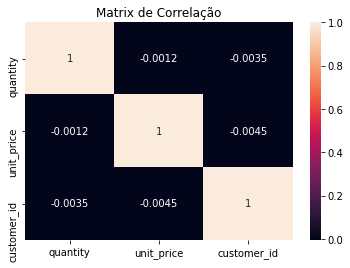

In [267]:
# Criando a matriz de correlação de dados
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matrix de Correlação')
plt.show()

**Conclusões**

A tabela apresentada mostra os coeficientes de correlação entre três variáveis: 'quantity', 'unit_price', e 'customer_id'. A correlação com CustomerID não faz sentido, por isso, não iremos levar em consideração em nossa abordagem. Assim, baseado nesses coeficientes, podemos concluir:

1. **Correlação entre Quantity e Unit_Price**: 
   - O coeficiente é -0.001238, o que é muito próximo de zero. Isto sugere que há uma correlação negligível entre a quantidade e o preço unitário. Em termos práticos, isso significa que alterações no preço unitário não estão fortemente associadas a alterações na quantidade comprada, e vice-versa.

2. **Correlações Diagonais**: 
   - Os valores na diagonal principal (de cima à esquerda para baixo à direita) são todos 1.00000. Isto é esperado, pois qualquer variável terá uma correlação perfeita consigo mesma.

Em resumo, as variáveis apresentadas têm correlações muito fracas entre si. Portanto, no contexto deste conjunto de dados, não podemos concluir que mudanças em uma dessas variáveis causariam mudanças previsíveis em qualquer uma das outras. Por exemplo, alterar o preço unitário de um item não teria um impacto significativo na quantidade do item que é comprada, pelo menos com base nesta análise de correlação.

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    401604 non-null  object        
 1   stock_code    401604 non-null  object        
 2   description   401604 non-null  object        
 3   quantity      401604 non-null  int64         
 4   invoice_date  401604 non-null  datetime64[ns]
 5   unit_price    401604 non-null  float64       
 6   customer_id   401604 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 24.9+ MB


### Análise dos dados das colunas

Iremos analisar cada uma das colunas para entender seus dados quantitativos e suas especificações.

#### Coluna invoice_no

Aqui iremos tentar entender o número de pedidos distintos e depois gerar um gráfico de linha com o número agregado de pedidos por dia, semana e mês.

In [269]:
# Número de pedidos únicos
unique_invoices = df['invoice_no'].nunique()
print(f"Número total de pedidos distintos: {unique_invoices}")

Número total de pedidos distintos: 22190


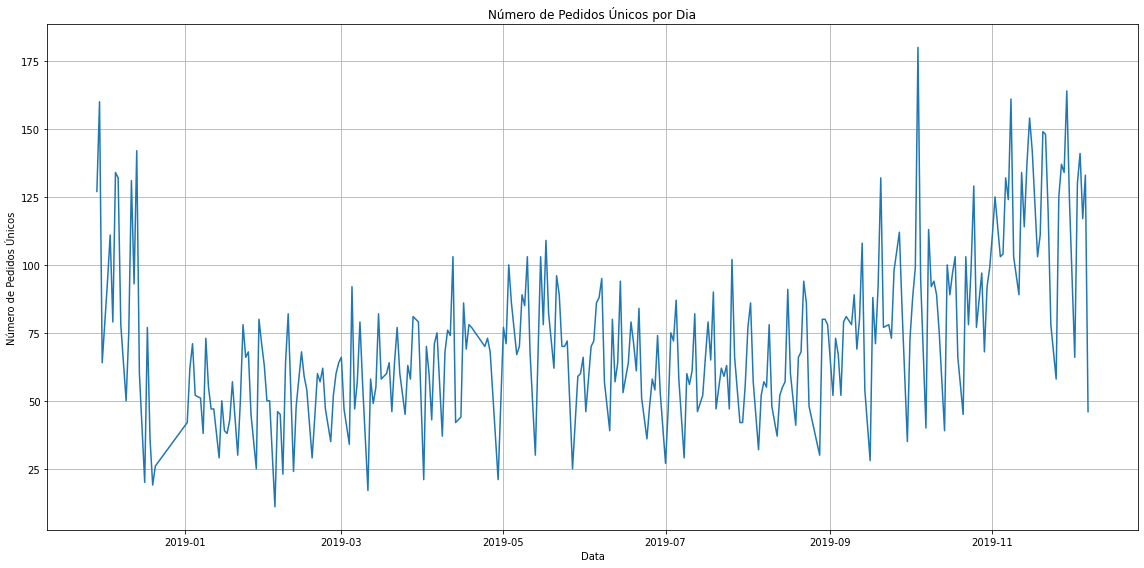

In [270]:
# Extraindo a data (sem a hora) da coluna 'invoice_date'
df['date'] = df['invoice_date'].dt.date

# Contando o número de pedidos únicos por dia
daily_orders = df.groupby('date')['invoice_no'].nunique()

# Plotando o gráfico de linha
plt.figure(figsize=(16, 8))
daily_orders.plot(kind='line')
plt.title('Número de Pedidos Únicos por Dia')
plt.xlabel('Data')
plt.ylabel('Número de Pedidos Únicos')
plt.grid(True)
plt.tight_layout()
plt.show()

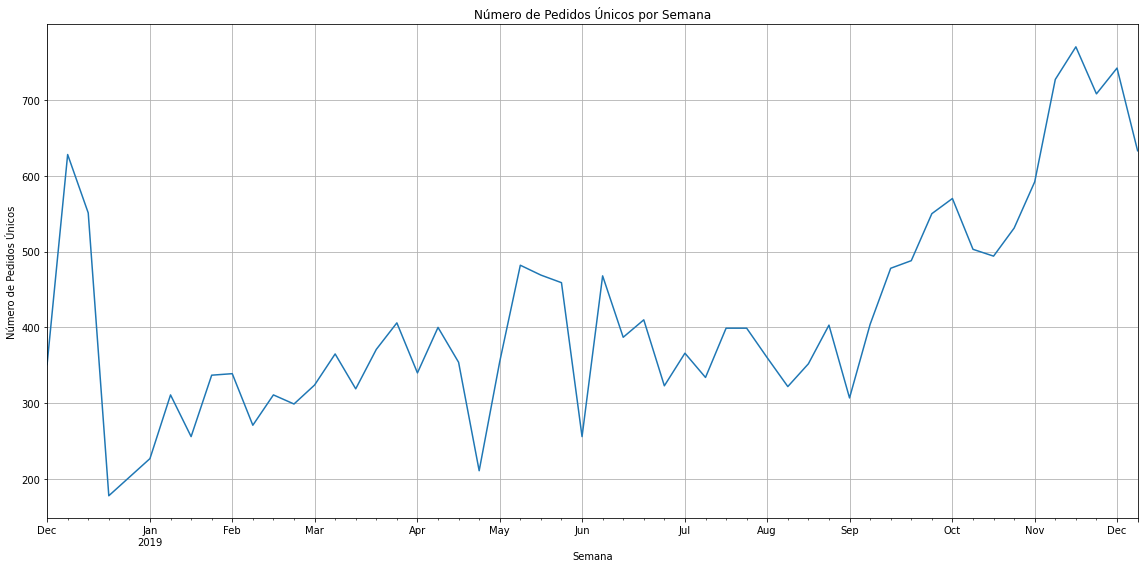

In [271]:
# Extraindo a semana e o ano da coluna 'invoice_date'
df['week_year'] = df['invoice_date'].dt.to_period('W')

# Contando o número de pedidos únicos por semana
weekly_orders = df.groupby('week_year')['invoice_no'].nunique()

# Plotando o gráfico de linha
plt.figure(figsize=(16, 8))
weekly_orders.plot(kind='line')
plt.title('Número de Pedidos Únicos por Semana')
plt.xlabel('Semana')
plt.ylabel('Número de Pedidos Únicos')
plt.grid(True)
plt.tight_layout()
plt.show()

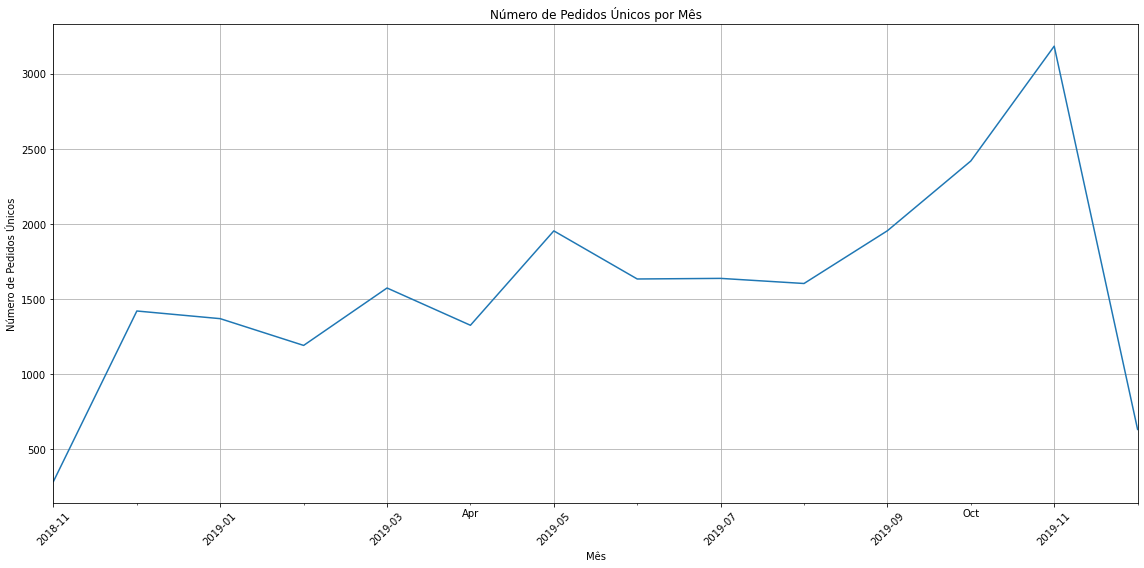

In [272]:
# Extraindo o mês e o ano da coluna 'invoice_date'
df['month_year'] = df['invoice_date'].dt.to_period('M')

# Contando o número de pedidos únicos por mês
monthly_orders = df.groupby('month_year')['invoice_no'].nunique()

# Plotando o gráfico de linha
plt.figure(figsize=(16, 8))
monthly_orders.plot(kind='line')

# Título e rótulos dos eixos
plt.title('Número de Pedidos Únicos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Pedidos Únicos')

# Ajustando o eixo x para exibir as datas de forma mais espaçada
xticks = monthly_orders.index[::2]  # Pega cada segundo rótulo para espaçar
plt.xticks(ticks=xticks, labels=xticks, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

In [273]:
# Capturando a data inicial e final da coluna 'invoice_date'
start_date = df['invoice_date'].min()
end_date = df['invoice_date'].max()

print(f"Data inicial: {start_date}")
print(f"Data final: {end_date}")

Data inicial: 2018-11-29 08:26:00
Data final: 2019-12-07 12:50:00


**Conclusões**

Podemos perceber que:

* O número total de pedidos distintos é de 22190 pedidos durante o período.

* O gráfico de pedidos diários demonstra sazonalidade nas compras diárias, com picos de altas e de baixa. O intuito aqui não é entender a ciclicidade das compras e sim o comportamento diário, por isso, não gerou-se cálculos precisos para tal.

* Ao gerar o gráfico com pedidos únicos semanais a tendência é mais clara, onde no meio do mês de Dezembro há uma queda grande nos pedidos e vai se recuperando gradualmente durante o ano. O padrão de queda se repete, pois ao final dos dados há uma queda no número de pedidos como visto anteriormente, mas de menor magnitude.

* Para o compilado dos pedidos mensais podemos observar que apesar da queda no meio do mês de Dezembro, o mês parece ser bom no geral para as vendas, apontando para uma primeira quinzena boa e a segunda ruim para 2018, mas com um padrão de crescimento no número de pedidos únicos mensais iguais aos observados no semanal.

* Apesar das visualizações dos dados apontarem para que o mês de novembro de 2018 foi ruim e dezembro de 2019 também, não é possível afirmar isso, pois não temos os dados completos do mês para afirmação de tal.

* O que pode-se observar e concluir de fato é de que há uma tendência no crescimento dos pedidos entre os períodos observados e objeto de estudo, revelando uma tração nas vendas do e-commerce.

* Além disso, há uma sazonalidade diária das vendas. Podendo ser um objeto de estudo para a criação de um modelo de previsão de vendas com Machine Learning posterior.

#### Coluna stock_code

Iremos analisar:

* Quantidade de valores únicos.
* Valores mais frequentes e sua contagem.
* Histograma ou gráfico de barras dos códigos de estoque mais frequentes. Isso nos ajudará a visualizar os códigos de estoque que são mais populares.
* Relacionamento com outras colunas

In [274]:
# Número de produtos únicos
unique_stock_codes = df['stock_code'].nunique()
unique_stock_codes

3684

In [275]:
# Agrupando por 'stock_code' e 'description', obtenha a contagem de frequência e ordene em ordem descendente
top_stock_with_description = df.groupby(['stock_code', 'description']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

print(top_stock_with_description)

     stock_code                         description  count
3475     85123A  WHITE HANGING HEART T-LIGHT HOLDER   2058
1322      22423            REGENCY CAKESTAND 3 TIER   1894
3460     85099B             JUMBO BAG RED RETROSPOT   1659
2805      47566                       PARTY BUNTING   1409
3288      84879       ASSORTED COLOUR BIRD ORNAMENT   1405
174       20725             LUNCH BAG RED RETROSPOT   1345
1611      22720   SET OF 3 CAKE TINS PANTRY DESIGN    1224
3915       POST                             POSTAGE   1196
177       20727             LUNCH BAG  BLACK SKULL.   1099
434       21212     PACK OF 72 RETROSPOT CAKE CASES   1062


**Conclusão Intermediária** 

Podemos ver que:

* Existem 3684 diferentes códigos de produtos cadastrados na analise realizada

* Temos um código de produto chamado de POST. Iremos tentar entender com mais clareza o que ela significa para continuar.

In [276]:
# Filtrando linhas onde a coluna 'stock_code' contém o código 'POST'
post_df = df[df['stock_code'] == 'POST']
post_df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,date,week_year,month_year
45,536370,POST,POSTAGE,3,2018-11-29 08:45:00,18.0,12583,2018-11-29,2018-11-26/2018-12-02,2018-11
386,536403,POST,POSTAGE,1,2018-11-29 11:27:00,15.0,12791,2018-11-29,2018-11-26/2018-12-02,2018-11
1123,536527,POST,POSTAGE,1,2018-11-29 13:04:00,18.0,12662,2018-11-29,2018-11-26/2018-12-02,2018-11
5073,536840,POST,POSTAGE,1,2018-11-30 18:27:00,18.0,12738,2018-11-30,2018-11-26/2018-12-02,2018-11
5258,536852,POST,POSTAGE,1,2018-12-01 09:51:00,18.0,12686,2018-12-01,2018-11-26/2018-12-02,2018-12
...,...,...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2019-12-07 10:10:00,15.0,12423,2019-12-07,2019-12-02/2019-12-08,2019-12
541216,581494,POST,POSTAGE,2,2019-12-07 10:13:00,18.0,12518,2019-12-07,2019-12-02/2019-12-08,2019-12
541730,581570,POST,POSTAGE,1,2019-12-07 11:59:00,18.0,12662,2019-12-07,2019-12-02/2019-12-08,2019-12
541767,581574,POST,POSTAGE,2,2019-12-07 12:09:00,18.0,12526,2019-12-07,2019-12-02/2019-12-08,2019-12


**Conclusão Intermediária** 

Podemos perceber que o código POST é de POSTAGE, ou seja, de envio dos produtos pros clientes. 

Isso deve ser, pois, o sistema considera como um pagamento o valor do frete e assim entra junta na nota fiscal. iremos deixar esses dados em nossa análise e analisar posteriromente.

Agora iremos gerar:

* Histograma ou gráfico de barras dos códigos de estoque mais frequentes. Isso nos ajudará a visualizar os códigos de estoque que são mais populares.

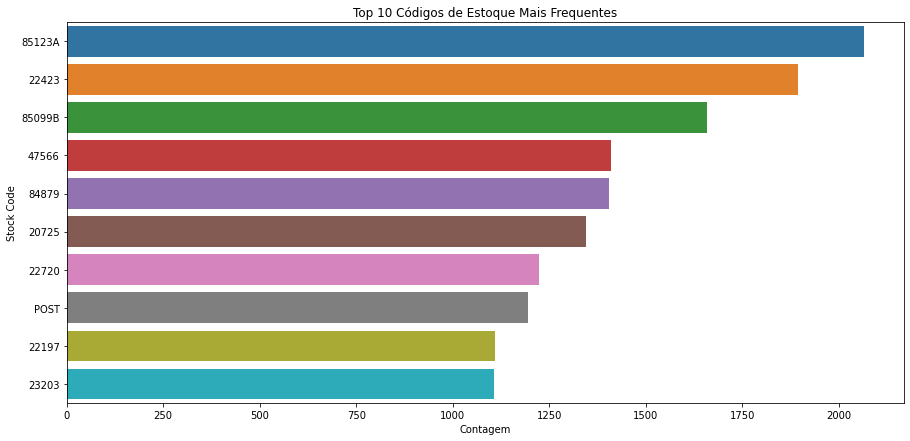

In [277]:
# Criando figura
plt.figure(figsize=(15, 7))

# Gerando o Plot
sns.countplot(data=df, y='stock_code', order=df['stock_code'].value_counts().index[:10])
plt.title('Top 10 Códigos de Estoque Mais Frequentes')
plt.xlabel('Contagem')
plt.ylabel('Stock Code')
plt.show()

In [278]:
# Contando a frequência de cada stock_code
stock_counts = df.groupby('stock_code').size().reset_index(name='count')

# Ordenando e pegando os top 10
top_10_stocks = stock_counts.sort_values(by='count', ascending=False).head(10)

# Juntando com a coluna description
top_10_stocks_with_desc = top_10_stocks.merge(df[['stock_code', 'description']].drop_duplicates(), 
                                              on='stock_code', 
                                              how='left')

# Demonstrando a tabela Top 10
top_10_stocks_with_desc

,stock_code,count,description
0,85123A,2065,WHITE HANGING HEART T-LIGHT HOLDER
1,85123A,2065,CREAM HANGING HEART T-LIGHT HOLDER
2,22423,1894,REGENCY CAKESTAND 3 TIER
3,85099B,1659,JUMBO BAG RED RETROSPOT
4,47566,1409,PARTY BUNTING
5,84879,1405,ASSORTED COLOUR BIRD ORNAMENT
6,20725,1346,LUNCH BAG RED RETROSPOT
7,20725,1346,LUNCH BAG RED SPOTTY
8,22720,1224,SET OF 3 CAKE TINS PANTRY DESIGN
9,POST,1196,POSTAGE


**Conclusões Intermediárias**

Com base nos produtos mais vendidos apresentados, chegamos às seguintes observações:

1. **Diversidade de Produtos**: O inventário reflete uma ampla gama de preferências dos clientes, abrangendo desde itens decorativos, como "WHITE HANGING HEART T-LIGHT HOLDER", até utilitários de cozinha, como "SET OF 3 CAKE TINS PANTRY DESIGN".
  
2. **Decorativos em Destaque**: Produtos como "WHITE HANGING HEART T-LIGHT HOLDER" e "ASSORTED COLOUR BIRD ORNAMENT" destacam-se, o que sugere uma predileção por itens decorativos entre os compradores.

3. **Afinidade com Cozinha**: Itens relacionados à cozinha, como "REGENCY CAKESTAND 3 TIER" e "LUNCH BAG RED RETROSPOT", também figuram entre os favoritos, indicando o apreço por produtos estilizados e funcionais para esse ambiente.

4. **Postagem na Lista**: É notável que "POSTAGE" esteja entre os itens mais adquiridos, sinalizando a possibilidade de muitas compras sendo enviadas ou de postagem sendo uma taxa separada em várias transações.

5. **Consistência de Dados**: Ao analisar o código de estoque e as descrições, nota-se potenciais inconsistências. Por exemplo, produtos com descrições levemente diferentes compartilhando o mesmo código de estoque, como "LUNCH BAG RED RETROSPOT" e "LUNCH BAG RED SPOTTY". Assim, para o uso futuro da geração de modelos para os clientes precisaremos utilizar o código dos produtos ao invés das descrições.

Iremos agora entender a analise de relacionamento de colunas:
    
Analisando como stock_code se relaciona com outras colunas pode oferecer insights valiosos:

* Verificaremos a média da quantity e unit_price para cada stock_code.

In [279]:
# Gerando dados
stock_summary = df.groupby('stock_code').agg({'quantity': 'mean', 'unit_price': 'mean'}).reset_index()
stock_summary

,stock_code,quantity,unit_price
0,10002,16.795918,0.850000
1,10080,13.857143,0.411905
2,10120,6.620690,0.210000
3,10123C,1.666667,0.650000
4,10124A,3.200000,0.420000
...,...,...,...
3679,D,-15.506494,72.484545
3680,DOT,1.000000,744.147500
3681,M,6.400000,338.044391
3682,PADS,1.000000,0.000750


**Conclusão**

Como observado anteriromente, podemos ver que existem códigos diferentes que se referem a outros serviços que não somente os de compras de produtos. Como por exemplo o código "D" pode se referir a descontos ou devoluções, já que a quantidade é negativa. Precisamos entender com mais precisão o que cada um deles significa.

Para tal, podemos observar que os padrões para tais são escritas somente sem números. Iremos tentar entender o que elas significam brevemente abaixo.

In [280]:
# Filtrar stock_code que contém somente letras e possivelmente espaços
filtered_df = df[df['stock_code'].str.match('^[A-Za-z ]+$')]

# Exibir stock_code e description
filtered_df = filtered_df[['stock_code', 'description']]
filtered_df = filtered_df.drop_duplicates()
filtered_df

,stock_code,description
45,POST,POSTAGE
141,D,Discount
2239,M,Manual
4406,BANK CHARGES,Bank Charges
157195,PADS,PADS TO MATCH ALL CUSHIONS
317507,DOT,DOTCOM POSTAGE
317508,CRUK,CRUK Commission


**Conclusões**

O conjunto de dados contém códigos de estoque que representam tanto produtos físicos quanto serviços/ajustes relacionados à compra:

1. Códigos como `POST`, `D`, `DOT`, e `CRUK` indicam ações como postagem, descontos e comissões, ao invés de produtos tradicionais.
2. Alguns códigos, como `PADS`, representam produtos específicos, neste caso, almofadas.
3. Como nosso intuito nesse projeto será gerar insights com os produtos consumidos pelos clientes iremos dar enfoque para os produtos e não os seriços entre outros. Dessa maneira iremos retirar os dados acima de nossa analise

In [281]:
# Retirando os dados
df = df[~df['stock_code'].str.match('^[A-Za-z ]+$')]

#### Coluna quantity

Para a coluna iremos gerar as analises:

1. **Estatísticas descritivas:**
    - Média
    - Mediana
    - Desvio padrão
    - Valor mínimo e máximo
    - Quartis

2. **Visualizações gráficas:**
    - Histograma
    - Box plot

3. **Análise de valores extremos (outliers)**

In [282]:
# Gerando estatística descritiva
df['quantity'].describe()

count    399823.000000
mean         12.225617
std         250.794906
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: quantity, dtype: float64

**Conclusão Intermediária**

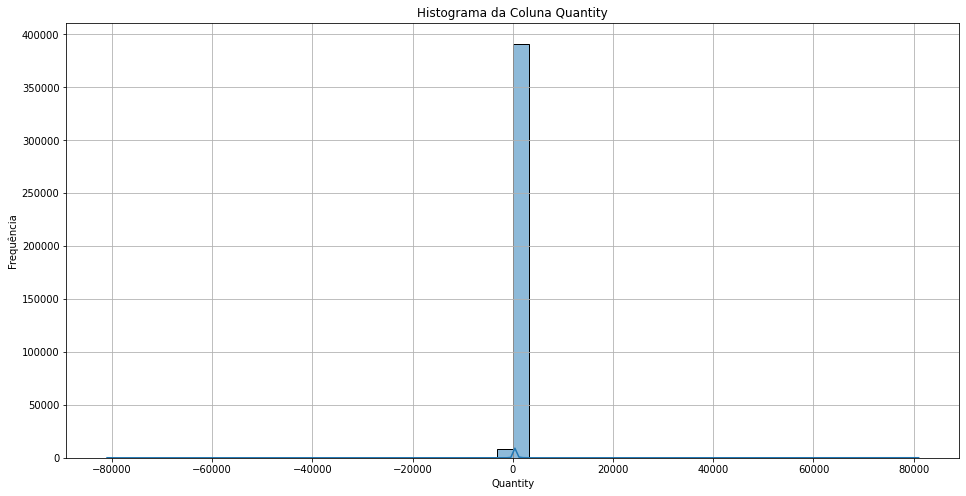

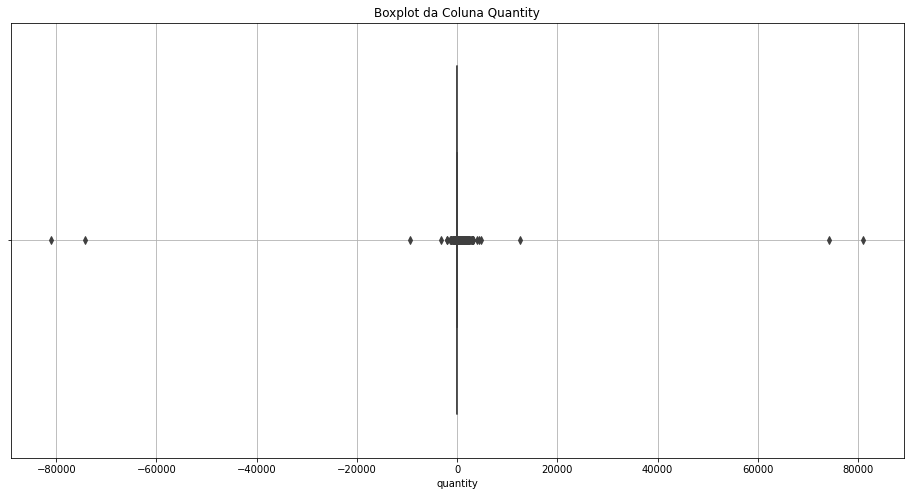

In [283]:
# Histograma
plt.figure(figsize=(16,8))
sns.histplot(df['quantity'], bins=50, kde=True)
plt.title('Histograma da Coluna Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(16,8))
sns.boxplot(x=df['quantity'])
plt.title('Boxplot da Coluna Quantity')
plt.grid(True)
plt.show()

**Conclusões**

Podemos perceber pelos gráficos e pela descrição gerada que:

* Existem dados discrepantes em nossa amostra, isso pode ser claramente visto pelo bloxpot gerado e pela amplitude do histograma;

* Pelos gráficos gerados não conseguimos observar com clareza no histograma qual o range e distribuição dos produtos, isso se dá ao fato de ter pedidos com um número de quantidade muito elevado negativo e positivo. Apesar disso, pode-se perceber que até 75% dos pedidos tem até 12 unidades.

* O fato de que o Q3 apresenta até 12 unidades em comparação com o boxplot gerado nos dá a clara impressão que precisamos tratar os outliers de nossa amostra. 

Temos dados negativos para quantidade, iremos gerar uma nova tabela com esses dados e entender se são erros ou como tratalos. Após isso, iremos tratar os Outliers retirando os dados utilizando os Quartil inferior e superior para tal, agregando os dados mais comuns na amostra.

Agora iremos gerar os dados com quantidades negativas para entender o que são e como tratar.

In [284]:
# Filtrando df
negative_quant = df[df['quantity'] < 0]

# Mostrando tabela
negative_quant

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,date,week_year,month_year
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311,2018-11-29,2018-11-26/2018-12-02,2018-11
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548,2018-11-29,2018-11-26/2018-12-02,2018-11
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548,2018-11-29,2018-11-26/2018-12-02,2018-11
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548,2018-11-29,2018-11-26/2018-12-02,2018-11
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2018-11-29 10:24:00,0.29,17548,2018-11-29,2018-11-26/2018-12-02,2018-11
...,...,...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2019-12-07 09:57:00,1.95,14397,2019-12-07,2019-12-02/2019-12-08,2019-12
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397,2019-12-07,2019-12-02/2019-12-08,2019-12
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311,2019-12-07,2019-12-02/2019-12-08,2019-12
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315,2019-12-07,2019-12-02/2019-12-08,2019-12


**Conclusões**

Podemos perceber que os dados negativos são apresentados nos produtos e não tem uma descrição se são devoluções ou erros na base repassada, dessa maneira e por não ter clareza do porquê esses dados estão dispostos assim iremos retirar, neste modelo, de nossa analise.

O correto, porém, seria entrar em contato com o Engenheiro de Dados responsável e realizar o questionamento para uma analise mais aprofundada.

In [285]:
# Calculando quartis
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['quantity'] < lower_bound) | (df['quantity'] > upper_bound)]
print(f"Número de outliers identificados: {len(outliers)}")

Número de outliers identificados: 26597


In [286]:
# Definindo os limites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrando o DataFrame para remover outliers
df = df[(df['quantity'] >= lower_limit) & (df['quantity'] <= upper_limit)]

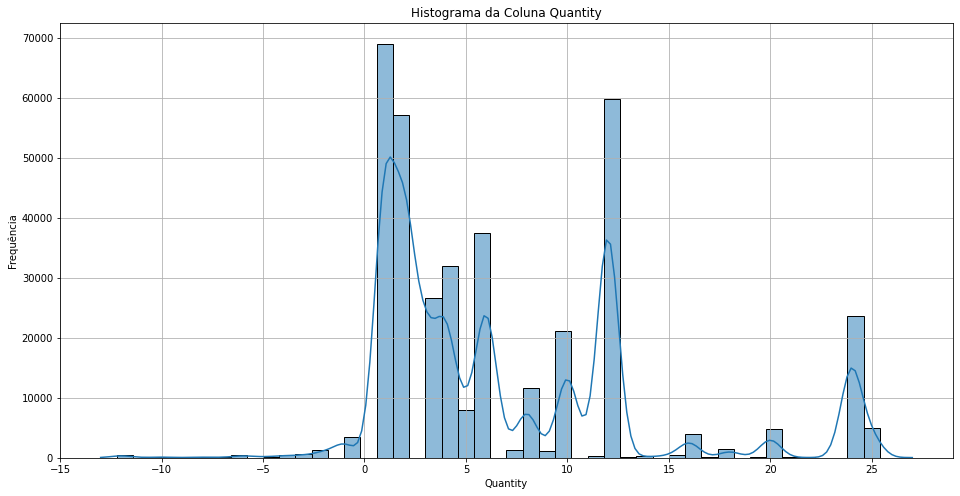

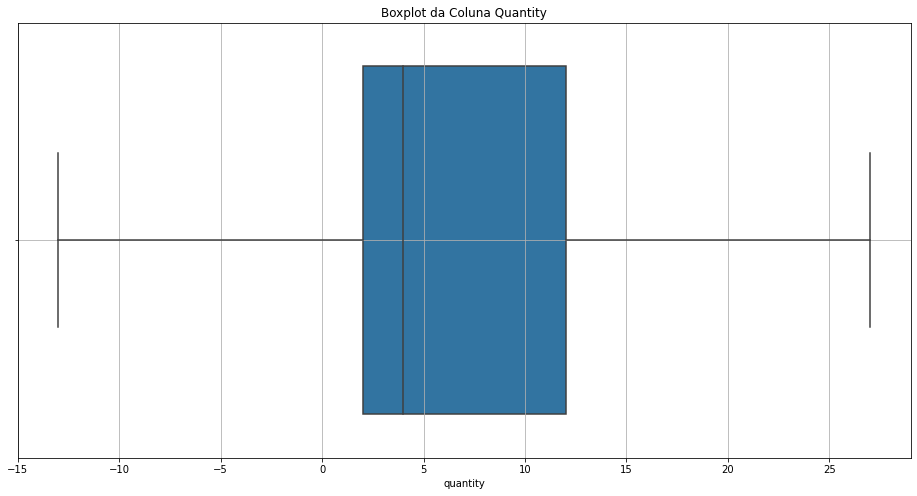

In [287]:
# Histograma
plt.figure(figsize=(16,8))
sns.histplot(df['quantity'], bins=50, kde=True)
plt.title('Histograma da Coluna Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(16,8))
sns.boxplot(x = df['quantity'])
plt.title('Boxplot da Coluna Quantity')
plt.grid(True)
plt.show()

**Conclusão**

Após a retirada dos outliers podemos perceber que os dados ficaram de maneira mais homogenia e aparentam a demonstrar mais a realidade das vendas. 

Agora, podemos perceber que o boxplot ficou amis correto e a distribuição faz mais sentido. Além disos, para distribuição seria interessante utilizar a mediana como valor central. Iremos retirar, também, os itens negativos, pois são devoluções e não entram em nossa analise.

In [288]:
# Filtrando para maiores de 0
df = df[df['quantity'] > 0]

#### Coluna unit_price

Iremos realizar as analises de:

1. Estatísticas Descritivas: Incluindo média, mediana, moda, desvio padrão, quartis, mínimo e máximo.

2. Visualizações:
* Histograma ou gráfico de densidade para ver a distribuição dos preços.
* Box plot para visualizar quartis e detectar outliers.
* Se apropriado, um gráfico de linha temporal se os preços mudam significativamente ao longo do tempo.

3. Detecção de Outliers: Usando, por exemplo, o método IQR.
4. Análise de Valores Zerados ou Negativos:

In [289]:
# Gerando estatística descritiva
print(df['unit_price'].describe())

count    365713.000000
mean          2.988140
std           4.363062
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: unit_price, dtype: float64


**Conclusões**

"A coluna `unit_price` conta com 365,713 entradas, com uma média de preço de aproximadamente 2.99 unidades. A mediana está em 1.95 unidades, o que sinaliza uma distribuição inclinada à direita. A considerável diferença entre o 75º percentil (3.75 unidades) e o valor máximo (649.50 unidades) destaca a presença de outliers. A maioria dos produtos tem preços abaixo de 3.75 unidades, mas existem alguns produtos com preços substancialmente elevados que elevam a média. 

Iremos analisar esses valores mais altos para assegurar a melhor veracidade dos dados possíveis.

Agora iremos apresentar as visualizações dos dados

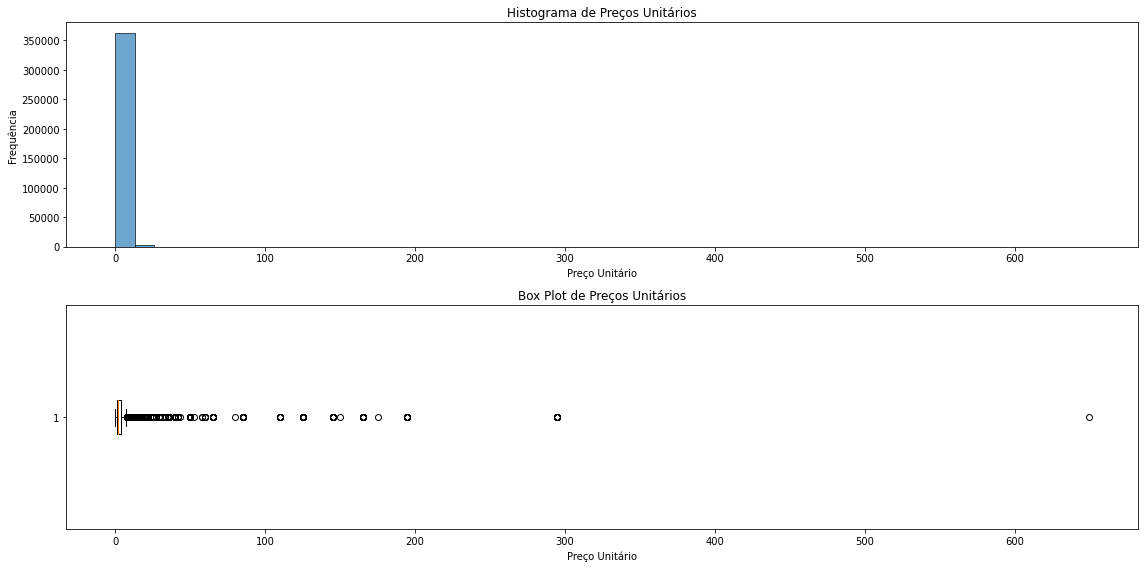

In [290]:
def plot_data(data, title, x_label):
    fig, axs = plt.subplots(2, 1, figsize=(16, 8))

    # Histograma
    axs[0].hist(data, bins=50, edgecolor='k', alpha=0.65)
    axs[0].set_title(f'Histograma de {title}')
    axs[0].set_xlabel(x_label)
    axs[0].set_ylabel('Frequência')

    # Boxplot
    axs[1].boxplot(data, vert=False)
    axs[1].set_title(f'Box Plot de {title}')
    axs[1].set_xlabel(x_label)

    plt.tight_layout()
    plt.show()

# Usando a função para visualizar os Preços Unitários
plot_data(df['unit_price'], 'Preços Unitários', 'Preço Unitário')

In [291]:
# Calculando os IQR
Q1 = df['unit_price'].quantile(0.25)
Q3 = df['unit_price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f'Limite inferior {lower_limit}')
print(f'Limite superior {upper_limit}')

Limite inferior -2.5
Limite superior 7.5


**Conclusão Intermediária**

Podemos observar que temos preços com valores surreais, acima de 1000 dolar por item. Iremos analisar os itens com valor acima dos limites e valores negativos. 

Pela distribuição podemos ver os preços dos produtos são de baixo valor agregado e assim não se justificam os valores tão altos dos produtos. Isso deve ser, provavalmente, erros do sistem de compilação.

Iremos estudar os dois casos afundo.

##### Valores negativos

In [292]:
# Calculando
zero_or_negative_prices = df[df['unit_price'] <= 0]
print("Número de registros com preços zerados ou negativos:", len(zero_or_negative_prices))

Número de registros com preços zerados ou negativos: 24


In [293]:
# Filtrar as linhas onde o unit_price é menor ou igual a zero
negative_or_zero_price_df = df[df['unit_price'] <= 0]

# Imprimir as linhas filtradas
negative_or_zero_price_df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,date,week_year,month_year
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2018-12-03 14:02:00,0.0,12647,2018-12-03,2018-12-03/2018-12-09,2018-12
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2018-12-14 14:36:00,0.0,16560,2018-12-14,2018-12-10/2018-12-16,2018-12
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2018-12-19 13:45:00,0.0,14911,2018-12-19,2018-12-17/2018-12-23,2018-12
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2019-01-04 16:41:00,0.0,13081,2019-01-04,2018-12-31/2019-01-06,2019-01
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2019-01-04 16:41:00,0.0,13081,2019-01-04,2018-12-31/2019-01-06,2019-01
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2019-01-11 15:10:00,0.0,15107,2019-01-11,2019-01-07/2019-01-13,2019-01
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2019-02-08 13:08:00,0.0,17560,2019-02-08,2019-02-04/2019-02-10,2019-02
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2019-03-28 12:45:00,0.0,13113,2019-03-28,2019-03-25/2019-03-31,2019-03
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2019-04-02 14:42:00,0.0,14410,2019-04-02,2019-04-01/2019-04-07,2019-04
157042,550188,22636,CHILDS BREAKFAST SET CIRCUS PARADE,1,2019-04-12 18:57:00,0.0,12457,2019-04-12,2019-04-08/2019-04-14,2019-04


**Conclusão**

Iremos retirar os valores que estão zerados, pois eles apresentam produtos e valores zerados podendo trazer erros para nossa análise futura.

In [294]:
# Mantendo apenas as linhas onde o unit_price é maior que zero
df = df[df['unit_price'] > 0]

##### Valores outliers

In [295]:
# Filtrando
outliers_price = df[df['unit_price'] > upper_limit]

# Imprimindo
outliers_price

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,date,week_year,month_year
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2018-11-29 08:26:00,7.65,17850,2018-11-29,2018-11-26/2018-12-02,2018-11
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2018-11-29 08:34:00,9.95,13047,2018-11-29,2018-11-26/2018-12-02,2018-11
19,536367,21777,RECIPE BOX WITH METAL HEART,4,2018-11-29 08:34:00,7.95,13047,2018-11-29,2018-11-26/2018-12-02,2018-11
20,536367,48187,DOORMAT NEW ENGLAND,4,2018-11-29 08:34:00,7.95,13047,2018-11-29,2018-11-26/2018-12-02,2018-11
63,536373,22752,SET 7 BABUSHKA NESTING BOXES,2,2018-11-29 09:02:00,7.65,17850,2018-11-29,2018-11-26/2018-12-02,2018-11
...,...,...,...,...,...,...,...,...,...,...
541763,581574,23111,PARISIENNE SEWING BOX,2,2019-12-07 12:09:00,12.50,12526,2019-12-07,2019-12-02/2019-12-08,2019-12
541786,581578,22622,BOX OF VINTAGE ALPHABET BLOCKS,6,2019-12-07 12:16:00,11.95,12713,2019-12-07,2019-12-02/2019-12-08,2019-12
541831,581579,22941,CHRISTMAS LIGHTS 10 REINDEER,4,2019-12-07 12:19:00,8.50,17581,2019-12-07,2019-12-02/2019-12-08,2019-12
541849,581580,22894,TABLECLOTH RED APPLES DESIGN,2,2019-12-07 12:20:00,9.95,12748,2019-12-07,2019-12-02/2019-12-08,2019-12


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365689 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    365689 non-null  object        
 1   stock_code    365689 non-null  object        
 2   description   365689 non-null  object        
 3   quantity      365689 non-null  int64         
 4   invoice_date  365689 non-null  datetime64[ns]
 5   unit_price    365689 non-null  float64       
 6   customer_id   365689 non-null  Int64         
 7   date          365689 non-null  object        
 8   week_year     365689 non-null  period[W-SUN] 
 9   month_year    365689 non-null  period[M]     
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4), period[M](1), period[W-SUN](1)
memory usage: 31.0+ MB


**Conclusão Intermediária**

Ao analisar os dados entendemos que o ecommerce trabalha com produtos para casas. Ao gerar os quartis, percebemos que o limite superior (Q1) tem um valor de até 7,5 dólares. Nesse contexto e sabendo com o que a empresa trabalha pode-se plausivelmente ter produtos com valores maiores que esse e, caso retirarmos da amostra, podemos afetar futuras segmentações de clientes que podemos realizar.

Desta maneira, iremos gerar tabelas com filtros de preços acima dos seguintes valores:

- 100 dolares
- 200 dolares
- 300 dolares


Posteriormente iremos analisar e entender o que podemos fazer para decidir o melhor filtro para nossos dados.

In [297]:
# Filtro de 100 dolares
outliers_price = df[df['unit_price'] > 100]
outliers_price

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,date,week_year,month_year
246,536392,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2018-11-29 10:29:00,165.0,13705,2018-11-29,2018-11-26/2018-12-02,2018-11
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,2018-11-30 18:06:00,295.0,13145,2018-11-30,2018-11-26/2018-12-02,2018-11
19428,537859,22828,REGENCY MIRROR WITH SHUTTERS,1,2018-12-06 16:11:00,165.0,14030,2018-12-06,2018-12-03/2018-12-09,2018-12
19429,537859,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,2,2018-12-06 16:11:00,145.0,14030,2018-12-06,2018-12-03/2018-12-09,2018-12
25168,538354,22826,LOVE SEAT ANTIQUE WHITE METAL,2,2018-12-08 15:45:00,175.0,16873,2018-12-08,2018-12-03/2018-12-09,2018-12
...,...,...,...,...,...,...,...,...,...,...
433190,573905,22655,VINTAGE RED KITCHEN CABINET,1,2019-10-30 15:06:00,125.0,16971,2019-10-30,2019-10-28/2019-11-03,2019-10
443596,574705,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2019-11-04 14:06:00,165.0,14553,2019-11-04,2019-11-04/2019-11-10,2019-11
468546,576512,22823,CHEST NATURAL WOOD 20 DRAWERS,4,2019-11-13 12:09:00,110.0,15524,2019-11-13,2019-11-11/2019-11-17,2019-11
471340,576635,22828,REGENCY MIRROR WITH SHUTTERS,2,2019-11-14 09:32:00,145.0,15269,2019-11-14,2019-11-11/2019-11-17,2019-11


In [298]:
# Filtro de 200 dolares
outliers_price = df[df['unit_price'] > 200]
outliers_price

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,date,week_year,month_year
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,2018-11-30 18:06:00,295.0,13145,2018-11-30,2018-11-26/2018-12-02,2018-11
32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,2018-12-14 08:41:00,295.0,16607,2018-12-14,2018-12-10/2018-12-16,2018-12
51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,2019-01-08 14:57:00,295.0,17406,2019-01-08,2019-01-07/2019-01-13,2019-01
82768,543253,22655,VINTAGE RED KITCHEN CABINET,1,2019-02-02 15:32:00,295.0,14842,2019-02-02,2019-01-28/2019-02-03,2019-02
118769,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,2019-03-12 11:38:00,295.0,13452,2019-03-12,2019-03-11/2019-03-17,2019-03
133994,547814,22656,VINTAGE BLUE KITCHEN CABINET,1,2019-03-23 14:19:00,295.0,13452,2019-03-23,2019-03-18/2019-03-24,2019-03
171178,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,2019-04-26 12:22:00,295.0,14973,2019-04-26,2019-04-22/2019-04-28,2019-04
205759,554836,22655,VINTAGE RED KITCHEN CABINET,1,2019-05-24 16:25:00,295.0,13015,2019-05-24,2019-05-20/2019-05-26,2019-05
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2019-06-08 15:33:00,649.5,15098,2019-06-08,2019-06-03/2019-06-09,2019-06


In [299]:
# Filtro de 300 dolares
outliers_price = df[df['unit_price'] > 300]
outliers_price

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,date,week_year,month_year
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2019-06-08 15:33:00,649.5,15098,2019-06-08,2019-06-03/2019-06-09,2019-06


**Conclusão**

Após observar os dados fatiados entre os grupos, podemos observar que existem produtos que são vendidos em Bulk, ou seja, não de maneira unitária mas em volumes maiores. Normalmente, empresas oferecem isso para vender mais e com preços menores.

Além disso, existem dados de produtos como Cabinet ou Sideboards que são produtos mais caros como havíamos colocado como premissa anteriromente. Dessa maneira, iremos deixar todos os dados em nossa analise, pois todos eles são compras reais e fazem sentido no âmbito de vendas, ou seja, não são erros e nem outliers, representando a realidade.

#### Coluna customer_id

Iremos gerar o número distintos de clientes e o número de clientes únicos por dia que realizaram pedido.

In [300]:
# Número de clientes únicos
unique_customers = df['customer_id'].nunique()
print(f"Número de clientes únicos: {unique_customers}")

Número de clientes únicos: 4227


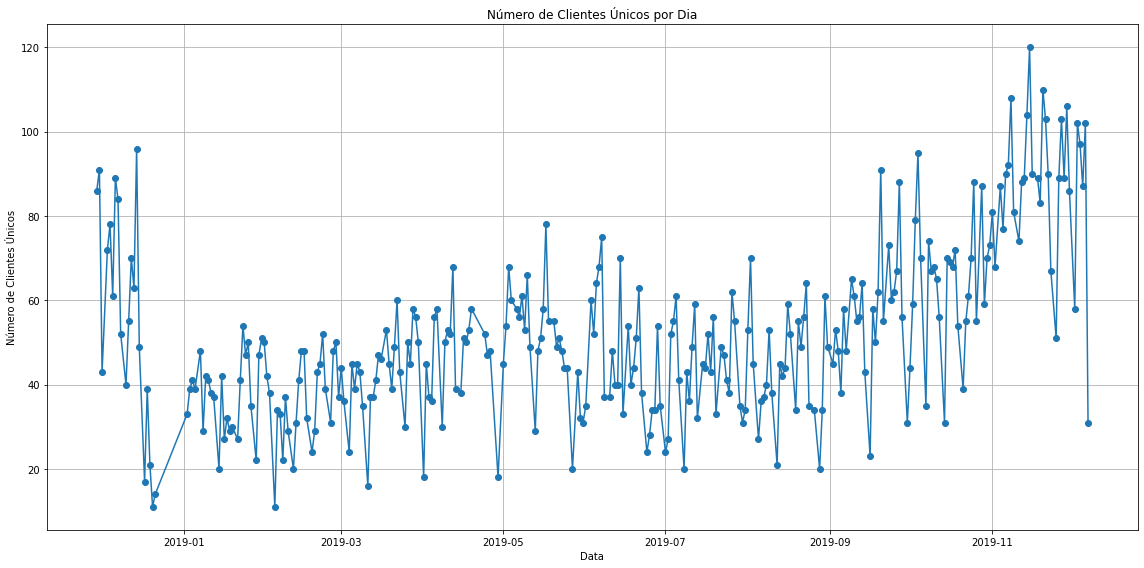

In [301]:
# Agrupando por data e contando clientes únicos
daily_unique_customers = df.groupby('date')['customer_id'].nunique()

# Plotando
daily_unique_customers.plot(figsize=(16, 8), marker='o', linestyle='-')
plt.title('Número de Clientes Únicos por Dia')
plt.xlabel('Data')
plt.ylabel('Número de Clientes Únicos')
plt.grid(True)
plt.tight_layout()
plt.show()

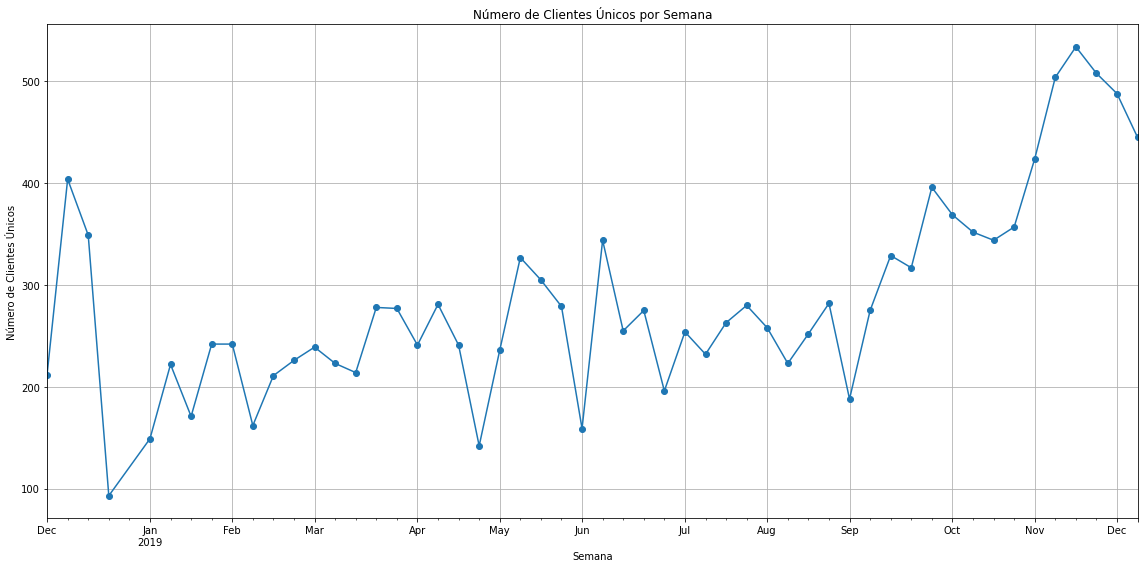

In [302]:
# Agrupando por semana e contando clientes únicos
weekly_unique_customers = df.groupby('week_year')['customer_id'].nunique()

# Plotando
weekly_unique_customers.plot(figsize=(16, 8), marker='o', linestyle='-')
plt.title('Número de Clientes Únicos por Semana')
plt.xlabel('Semana')
plt.ylabel('Número de Clientes Únicos')
plt.grid(True)
plt.tight_layout()
plt.show()

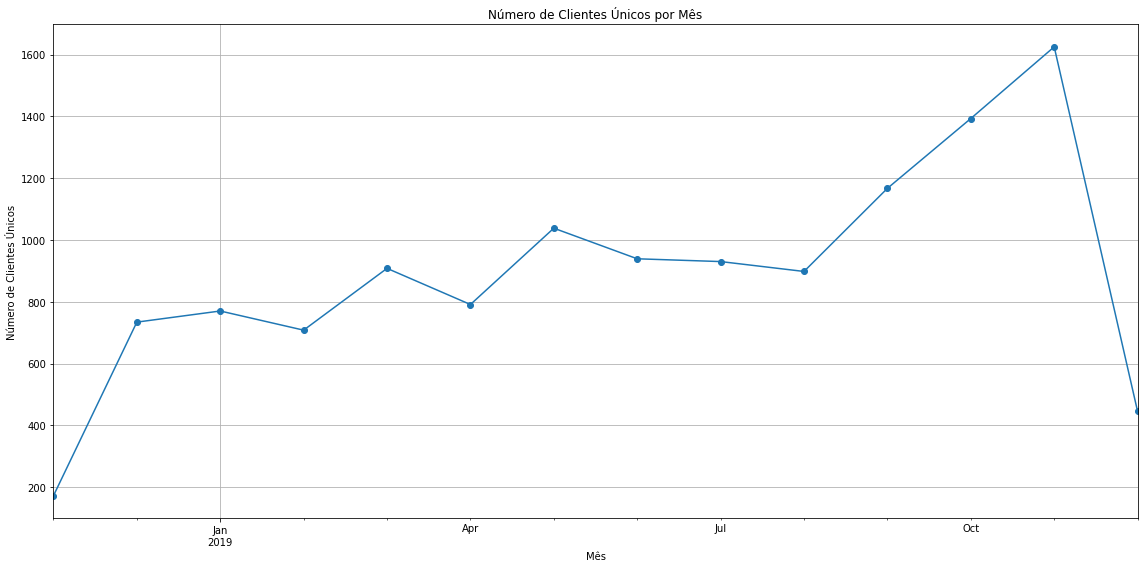

In [303]:
# Agrupando por mês e contando clientes únicos
monthly_unique_customers = df.groupby('month_year')['customer_id'].nunique()

# Plotando
monthly_unique_customers.plot(figsize=(16, 8), marker='o', linestyle='-')
plt.title('Número de Clientes Únicos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Clientes Únicos')
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusão**

* O número de clientes é de 4227 clientes diferentes, um volume expressivo de clientes≥

* Assim como no número de invoice, podemos perceber a mesma tendencia para os gráficos diários, semanais e mensais. Isso apresenta uma sinergia entre ambos, ou seja, o crescimento no número de pedidos se deve ao crescimento no número de clientes na plataforma, provavelmente.

## Segmentação de usuários

A segmentação de usuários é um passo essencial no processo de entender e melhor atender os diferentes perfis de clientes que interagem com nossa plataforma. Ao segmentar os usuários com base no histórico de compras, podemos identificar padrões específicos de comportamento, preferências e hábitos de compra que, por sua vez, nos permitem criar estratégias de marketing mais eficazes.

Nesta seção, exploraremos diversas abordagens para segmentar nossos usuários. Embora haja diversas maneiras de abordar a segmentação, um ponto de partida é examinar o que os usuários compram. Ao analisar suas compras, podemos agrupar mercadorias de acordo com a categoria de produto a que pertencem, revelando insights sobre as preferências dos usuários.

A ideia é ir além da segmentação superficial e realmente mergulhar nos dados, permitindo-nos desenvolver ofertas mais personalizadas e relevantes para cada segmento. A personalização não é apenas uma forma eficaz de aumentar a fidelidade do cliente, mas também de maximizar o ROI em campanhas de marketing.

Iremos aplicar alguns métodos para segmentar os usuários sendo:

1. Análise de RFM (Recência, Frequência, Monetaridade)
2. Segmentação Baseada no Produto (Utilizando K-means)
3. Segmentação Baseada em Valor Total de Compra

### Análise RFM

A análise RFM (Recência, Frequência e Monetaridade) é uma técnica de segmentação de clientes que utiliza o comportamento de compra passado para dividir os clientes em grupos. O RFM ajuda a dividir os clientes em várias categorias ou clusters para identificar clientes mais propensos a responder a promoções e também para futuros serviços personalizados.

* Recência (R): Quando a última compra foi feita.
* Frequência (F): Com que frequência as compras são feitas.
* Valor Monetário (M): Quanto é gasto.
* Implicações Comerciais

Com base na pontuação RFM atribuída, os clientes são divididos em 11 segmentos:

1. Campeão: Comprou recentemente, faz pedidos frequentemente e gasta mais.
2. Leal: Faz pedidos regularmente. Responde bem a promoções.
3. Potencialmente Leal: Clientes recentes e gastaram um bom valor.
4. Novos Clientes: Fizeram a compra mais recentemente.
5. Promissores: Eram potencialmente leais alguns meses atrás. Gastam frequentemente e um bom valor. Mas a última compra foi há várias semanas.
6. Núcleo: Clientes padrão com uma compra não tão distante.
7. Precisa de atenção: Clientes do núcleo cuja última compra aconteceu há mais de um mês.
8. Não podemos perdê-los, mas estamos perdendo: Fizeram os maiores pedidos, e frequentemente. Mas não retornaram por muito tempo.
9. Em Risco: Semelhante a "Não podemos perdê-los, mas estamos perdendo", mas com menor valor monetário e frequência.
10. Perdendo mas engajado: Fizeram a última compra há muito tempo, mas nas últimas 4 semanas visitaram o site ou abriram um e-mail.
11. Perdido: Fizeram a última compra há muito tempo e não se envolveram de forma alguma nas últimas 4 semanas.

Cada um dos componentes RFM recebe uma pontuação entre 1 e 5 (sendo 5 a melhor pontuação).

A divisão de Recência (R), Frequência (F) e Monetário (M):

* Campeão [R(4 – 5), F(4 – 5), M(4 - 5)]
* Leal [R(3 – 5), F(3 – 5), M(1 - 3)]
* Potencialmente Leal [R(4 – 5), F(1 – 3), M(3 - 5)]
* Novos Clientes R [(4 – 5), F(1 – 2), M(1 - 5)]
* Promissor [R(2 – 3), F(1 – 3), M (3 - 5)]
* Núcleo [R(2-3), F(2-3), M(2-3)]
* Precisa de Atenção R [(1 – 2), F(2 – 3), M(1 - 3)]
* Não Podemos Perder, mas Perdendo [R(1 – 3), F(3 – 5), M(4 - 5)]
* Em Risco [R(1 – 2), F(2 – 5), M(1 - 3)]
* Perdendo mas Engajado [R(2 – 3), F(1 - 2), M(1 - 5)]
* Perdido [R(1), F(1 – 2), M(1 - 5)]

In [304]:
# Criando nova coluna com total de compra
df['TotalPurchase'] = df['quantity'] * df['unit_price']

# A data de referência pode ser definida como a data da última fatura + 1 dia
reference_date = df['invoice_date'].max() + pd.Timedelta(days=1)

rfm = df.groupby('customer_id').agg({
    'invoice_date': lambda invoice_date: (reference_date - invoice_date.max()).days,
    'invoice_no': lambda invoice_no: invoice_no.nunique(),
    'TotalPurchase': lambda TotalPurchase: TotalPurchase.sum()
})

rfm.columns = ['recency', 'frequency', 'monetary']

rfm["RecencyScore"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["FrequencyScore"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["MonetaryScore"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm["RFM_Score"] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

seg_map = {
    r'[4-5][4-5][4-5]': 'champion',
    r'[3-5][3-5][1-3]': 'loyal',
    r'[4-5][1-3][3-5]': 'potential_loyalist',
    r'[4-5][1-2][1-5]': 'new_customers',
    r'[2-3][1-3][3-5]': 'promising',
    r'[2-3][2-3][2-3]': 'core',
    r'[1-2][2-3][1-3]': 'need_attention',
    r'[1-3][3-5][4-5]': 'cant_lose',
    r'[1-2][2-5][1-3]': 'at_Risk',
    r'[2-3][1-2][1-5]': 'losing_Engaged',
    r'1[1-2][1-5]': 'lost'
}

rfm['segment'] = rfm['RFM_Score'].replace(seg_map, regex=True)
rfm.reset_index(inplace=True)

In [305]:
# Mostrando a segmentação de nossos clientes
rfm

,customer_id,recency,frequency,monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,segment
0,12347,2,7,3643.58,5,5,5,555,champion
1,12348,249,3,90.20,1,3,1,131,need_attention
2,12349,19,1,1367.55,4,1,4,414,potential_loyalist
3,12350,310,1,294.40,1,1,2,112,lost
4,12352,36,7,1385.74,3,5,4,354,cant_lose
...,...,...,...,...,...,...,...,...,...
4222,18280,278,1,180.60,1,2,1,121,need_attention
4223,18281,181,1,80.82,1,2,1,121,need_attention
4224,18282,8,2,164.13,5,3,1,531,loyal
4225,18283,4,16,2039.58,5,5,5,555,champion


In [306]:
# Gerando Treemap
segments_count = rfm.groupby('segment').size().reset_index(name='count')

fig = px.treemap(segments_count, 
                 path=[px.Constant("segment"), 'segment'], 
                 values='count',
                 color='count', 
                 hover_data=['count'], 
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(segments_count['count'], weights=segments_count['count']))

fig.show()

**Conclusão**

Utilizando a segmentação RFM, somos capazes de extrair insights valiosos sobre nossa base de clientes, oferecendo uma compreensão clara sobre o engajamento de cada segmento.

A análise e visualização dos dados nos permite destacar que:

1. Nossa base de clientes é diversificada:
   - Possuímos um número significativo de clientes categorizados como "campeões" e "leais", demonstrando um forte engajamento de uma parte expressiva de nossa base.
   - Observamos um crescimento encorajador na quantidade de clientes "promissores" e "novos clientes", sinalizando uma oportunidade de conversão destes para categorias mais engajadas.

2. Contudo, uma parcela considerável de nossa base é composta por clientes que demandam atenção imediata:
   - Clientes classificados como "necessitando de atenção", "perdendo engajamento" e "em risco" combinados representam um segmento que não deve ser negligenciado, dado seu potencial impacto sobre o negócio.
   
3. Existe um potencial inexplorado:
   - Os "novos clientes" e "potenciais clientes leais" representam uma oportunidade. Com as estratégias certas, eles podem migrar para categorias mais engajadas, ampliando sua contribuição ao negócio.

**Recomendações Baseadas nos Insights:**

- O foco em **retenção** deve ser priorizado, dada a quantidade de clientes que estão "perdendo engajamento", "em risco" e "necessitando de atenção". Ações específicas, como campanhas de e-mail marketing, ofertas especiais ou programas de fidelidade, podem ser eficazes aqui.
  
- Os "novos clientes" e "potenciais clientes leais" devem ser alvo de estratégias de **engajamento**. Oferecer suporte, introduzir a programas de fidelidade e fornecer recomendações personalizadas são algumas das ações que podem ser consideradas.

---

Espero que essa conclusão revisada lhe ajude a comunicar os insights de forma mais clara e concisa.

Com esses dados personalizados e agrupados pelos diferentes clientes, podemos, por exemplo, tratar cada um deles de maneira diferente, afim de fidelizar ainda mais o cliente, incentivar ou tentar reativar os mesmos. Seguem algumas recomendações padrões para cada grupo da analise RFM:

---

**Campeão (Champion)**: 
- Recompense-os.
- Podem ser os primeiros a adotar novos produtos.
- Promoverão sua marca.
- Muito provavelmente enviarão referências.

**Leal (Loyal)**:
- Ofereça produtos de maior valor.
- Peça por avaliações.

**Potencialmente Leal (Potential Loyalist)**:
- Ofereça programa de fidelidade/membros.
- Mantenha-os engajados.
- Ofereça recomendações personalizadas.

**Novos Clientes (New Customers)**:
- Forneça suporte de integração.
- Dê a eles acesso antecipado.
- Comece a construir um relacionamento.

**Promissores (Promising)**:
- Ofereça cupons.
- Traga-os de volta à plataforma.
- Mantenha-os engajados.
- Ofereça recomendações personalizadas.

**Principal (Core)**:
- Faça ofertas por tempo limitado.

**Precisa de Atenção (Needs attention)**:
- Faça ofertas por tempo limitado.
- Ofereça recomendações personalizadas.

**Não Podemos Perdê-los, Mas Estamos Perdendo (Can’t lose them but losing)**:
- Reconquiste-os através de renovações ou novos produtos.
- Não os perca para a concorrência.
- Fale com eles se necessário.
- Dedique tempo à personalização mais detalhada possível.

**Em Risco (At Risk)**:
- Forneça recursos úteis no site.
- Envie e-mails personalizados.

**Perdendo, mas Engajado (Losing but engaged)**:
- Torne as linhas de assunto dos e-mails muito personalizadas.
- Reviva o interesse deles com um desconto específico em um produto específico.

**Perdido (Lost)**:
- Reviva o interesse com campanhas de alcance.
- Ignore-os, caso contrário.

---

### Segmentação baseada no produto

Segmentar produtos usando técnicas de aprendizado não supervisionado, como clustering, pode ser uma maneira eficaz de entender as associações entre diferentes produtos. Isso pode ser especialmente útil para fazer recomendações cruzadas, em que, com base na compra de um produto por um cliente, você pode recomendar outros produtos que outras pessoas também compraram.

Para fazer isso, usaremos uma abordagem de co-ocorrência, onde a ideia principal é observar quais produtos são frequentemente comprados juntos. Posteriormente, podemos utilizar a técnica de KMeans para segmentar esses produtos em grupos.

Vamos ver uma implementação passo a passo:

1. Criar uma matriz de co-ocorrência de produtos.
2. Clusterizar os produtos usando KMeans.
3. Analisar os clusters resultantes.

Esse tipo de método é muito útil para sistemas de recomendação do tipo 'Quem levou esse item também levou esse outro:"

Começamos criando uma tabela pivot dos dados, onde cada entrada indica se um produto foi comprado em uma determinada compra. Usando essa tabela, criamos uma matriz de co-ocorrência que indica quantas vezes dois produtos foram comprados juntos.

A matriz de co-ocorrência é então clusterizada usando KMeans. Os clusters resultantes representarão grupos de produtos que são frequentemente comprados juntos. Esta informação pode ser utilizada para fazer recomendações de produtos para clientes com base no que eles já compraram.


**Explicação do código**

1. Criação do Pivot: Iremos gerar um pivot_table entre os dados de invoice e produtos, onde os invoices serão as linhas e os produtos as colunas. Caso o produto tenha sido adquirido na invoice (fatura) o sistema irá aparecer 1, caso o contrário 0. Iremos deixar em binário para posterior trabalho. Precisamos do Pivot para padronizar os dados de maneira que possamos trabalhar posteriormente de maneira binária.

2. Com a nossa pivot_table disposta com produtos e invoice de maneira binária geramos uma matriz de co-ocorrência que, matematicamente, nada mais é que uma vetorização (i,j). Ela é feita através da multiplicação de nosso pivot com um pivot transposto. Fazemos isso para que possamos encontrar produtos que foram comprados juntos, pois na multiplicação de matrizes iremos ter binariamente (0,1) caso a multiplicação seja 1x0 teremos 0, caso 1x1 teremos 1. Assim, saberemos cada produto que foi comprado junto.

3. O objetivo real desse cluster será a criação de um sistema de recomendação de produtos, de maneira incial, com o quesito de instigar e de curiosidade. Podendo gerar insights para a empresa.

In [307]:
# Criando cópia de df
data = df.copy()

# Criando uma tabela pivot com invoice_no como índice e produtos como colunas
pivot_table = data.pivot_table(index='invoice_no', columns='stock_code', values='quantity', aggfunc='sum').fillna(0)

In [308]:
# Convertendo as quantidades em 0 ou 1 de forma vetorizada
pivot_table = (pivot_table > 0).astype(int)

# Matriz de co-ocorrência usando multiplicação de matrizes
cooccurrence_matrix = pivot_table.T.dot(pivot_table)
cooccurrence_matrix = (cooccurrence_matrix > 0).astype(int)

# Diagonal principal da matriz de co-ocorrência deve ser setada para 1
np.fill_diagonal(cooccurrence_matrix.values, 1)

In [309]:
cooccurrence_matrix

stock_code,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,C2
stock_code,,,,,,,,,,,,,,,,,,,,,
10002,1,0,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
10080,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10120,1,0,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
10123C,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10124A,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90214V,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
90214W,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
90214Y,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,1,1,1,1,1,0


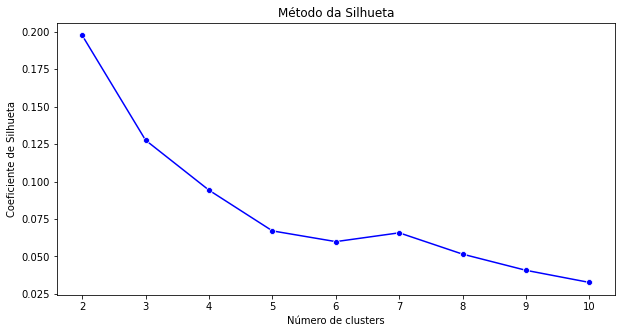

In [310]:
# Normalizar os dados para ter média 0 e desvio padrão 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cooccurrence_matrix)

# Determinando o número ótimo de clusters através do método da Silhueta
silhouette_scores = []
for i in range(2, 11):  # Começamos de 2 porque o coeficiente de silhueta requer pelo menos 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(2, 11), y=silhouette_scores, marker='o', color='blue')
plt.title('Método da Silhueta')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.show()

**Conclusão Intermediária**

Podemos observar que pelo método Silhueta para definição de clusters teríamos que a melhor escolha pelo coeficiente é de 2 clusters.

Também é possível ver que que há uma queda grande de 2 até 5 grupos. Para tal, iremos utilizar o número de clusters de 3 para os produtos. Esse valor pode e deve ser melhorado com o tempo com outras analises futuras para os clusters. No caso seria interessante categorizar melhor a base por categorias de produtos.

Dessa maneira iremos criar um cluster com 3 grupos.

In [311]:
# Suponhamos que 3 seja o número ótimo de clusters determinado pelo método Silhueta
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

cooccurrence_matrix['Cluster'] = clusters

print(cooccurrence_matrix['Cluster'].value_counts().sort_index())

0    1045
1    1347
2    1250
Name: Cluster, dtype: int64


In [312]:
cooccurrence_matrix.head(3)

stock_code,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,C2,Cluster
stock_code,,,,,,,,,,,,,,,,,,,,,
10002,1,0,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,2
10080,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10120,1,0,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,2


In [313]:
# Definindo o número de clusters que você deseja (por exemplo, 3)
n_clusters = 3

# Realizando a clusterização
clusters = kmeans.fit_predict(cooccurrence_matrix)

# Criando um DataFrame para os clusters
clusters_df = pd.DataFrame({
    'stock_code': cooccurrence_matrix.index,
    'cluster': clusters
})

# Mesclando os clusters ao DataFrame principal
df = df.merge(clusters_df, on='stock_code', how='left')

# Mostrando a df
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,date,week_year,month_year,TotalPurchase,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,2018-11-29,2018-11-26/2018-12-02,2018-11,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,2018-11-26/2018-12-02,2018-11,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,2018-11-29,2018-11-26/2018-12-02,2018-11,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,2018-11-26/2018-12-02,2018-11,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,2018-11-26/2018-12-02,2018-11,20.34,1
...,...,...,...,...,...,...,...,...,...,...,...,...
365684,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680,2019-12-07,2019-12-02/2019-12-08,2019-12,10.20,1
365685,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680,2019-12-07,2019-12-02/2019-12-08,2019-12,12.60,1
365686,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680,2019-12-07,2019-12-02/2019-12-08,2019-12,16.60,1
365687,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680,2019-12-07,2019-12-02/2019-12-08,2019-12,16.60,1


**Conclusão**

Conseguimos gerar um modelo de clusterização utilizando K-means para recomendação de produtos. Para tal utilizamos as colunas de invoice e produto para entender em diferentes faturas quais produtos foram comprados juntos.

A partir desse entendimento, criou-se uma tabela com os dados binários (0,1) para cada invoice e gerou-se um tabela vetor que chamamos de `cooccurrence_matrix`. Essa matriz, nos dá os produtos que foram comprados juntos, apresentando tanto na coluna quanto nas linhas os produtos. Essa tabela deve-se ler da segeuinte maneira:

- O produto da coluna 1 e o produto da linha 2:

    * caso o valor seja 1: são comprados juntos
    * caso om valor seja 0: não são comprados juntos

Depois da geração desta matriz, normalizamos os dados e analisamos o número de clusters ótimos. Em nosso caso, optamos por separar os grupos de produtos em 3 grandes grupos de compras. Com tais dados na mão, utilizamos K-means para gerar os clusters em base a nossa matriz normalizada. O algorítimo irá tentar compreender quais itens tem correlação de compra em base as compras em conjunto.

Ao final, geramos 3 grandes grupos de produtos que são comprados, normalmente, em conjunto ou que tem a probabilidade de serem adquiridos em conjunto pelos clientes. Desta maneira, quando algum cliente entrar na página de algum produto o algoritmo poderá rodar e realizar recomendações de compras em conjunto ao que ele produto, fornecendo a possiblidade de cross-selling. Tais sistemas já tem grande usabilidade por grandes ecommerces como Amazon e Mercado Livre.

Outro insight importante pode ser utilizado para o entedimento dos clientes, pois podemos entender qual o comportamento de compra do cliente perante cada grupo (cluster) e quais os produtos ou categorias que ele mais procura, podendo oferecer de maneira personalizada futuramente os produtos que ele não adquiriu dentro do cluster que ele mais compra.

Outra possibilidade, ainda, é de compreender como cada cluster de produto está rendendo para a empresa e como pode-se aumentar o agrupamento.

Logo, com tantas possibilidades podemos concluir que os clusters gerados podem ser de grande valiosidade para o ecommerce e para entender os perfis de produtos e clientes diferentes.

Um caso interessante, poderia ser se para cada clientes criassemos um agrupamento e entedessemos qual grupo ele compra mais e, em base nisso, criar uma campanha de marketing ou cupom personalizado para ele.

### Segmentação baseada no valor de compra

Segmentação Baseada em Valor Total de Compra

Dentro da análise RFM, a segmentação com base no valor total de compra é uma técnica valiosa que se concentra especificamente na Monetaridade (M). Ela categoriza os clientes com base no total que gastaram, ajudando as empresas a entender quais clientes são os mais valiosos em termos de receita gerada.

Ao segmentar os clientes em categorias de "alto valor", "valor médio" e "baixo valor", as empresas podem direcionar suas estratégias de marketing e ofertas para atender melhor a cada segmento. Por exemplo, os clientes de "alto valor" podem receber ofertas especiais ou recompensas por sua lealdade, enquanto os clientes de "baixo valor" podem ser alvo de campanhas de upsell ou cross-sell.

Iremos criar uma segmentação simples baseada nos valores consumidos pelos clientes e irão ser segmentados em três grupos:

* Clientes de alto valor --> Quartil superior dos valores gastos.
* Clientes de médio valor --> Entre os quartis superiro e inferior
* Clientes de baixo valor --> Até o quartil inferior de valor gasto.

Isso nos dá um norte para saber em criar ações específicas para clientes e melhorar a conversão e dar mais incentivo para clientes de alto valor.

In [314]:
# Valor total gasto
total_spend = df.groupby('customer_id')['unit_price'].sum().sort_values(ascending=False)

# Clientes de alto valor
high_value = total_spend[total_spend >= total_spend.quantile(0.75)]

# Clientes de médio valor
mid_value = total_spend[(total_spend < total_spend.quantile(0.75)) & (total_spend > total_spend.quantile(0.25))]

# Clientes de baixo valor
low_value = total_spend[total_spend <= total_spend.quantile(0.25)]

In [315]:
# Mostrando clientes de alto valor
high_value

customer_id
14911    22314.20
14096    21341.04
17841    19417.83
12748    10348.59
14606     7477.93
           ...   
12838      276.64
12429      276.44
17198      276.44
14621      276.29
12381      276.29
Name: unit_price, Length: 1057, dtype: float64

In [316]:
# Mostrando clientes de médio valor
mid_value

customer_id
15093    276.19
17092    275.99
13196    275.86
12598    275.82
14250    275.79
          ...  
14853     51.10
16884     51.08
16366     50.92
14804     50.89
17506     50.88
Name: unit_price, Length: 2113, dtype: float64

In [317]:
# Mostrando clientes de baixo valor
low_value

customer_id
15287    50.82
13519    50.75
15148    50.71
16803    50.48
13784    50.44
         ...  
17212     0.79
17857     0.55
14616     0.42
18058     0.29
15744     0.29
Name: unit_price, Length: 1057, dtype: float64

In [318]:
# Segmentação dos clientes
total_spend = df.groupby('customer_id')['TotalPurchase'].sum()

# Definindo a segmentação
conditions = [
    (total_spend >= total_spend.quantile(0.75)),
    (total_spend < total_spend.quantile(0.75)) & (total_spend > total_spend.quantile(0.25)),
    (total_spend <= total_spend.quantile(0.25))
]

choices = ['high_value', 'mid_value', 'low_value']

segment = pd.Series(np.select(conditions, choices, default='mid_value'), index=total_spend.index).reset_index(name='segment')

# Resultado
segment

,customer_id,segment
0,12347,high_value
1,12348,low_value
2,12349,high_value
3,12350,mid_value
4,12352,high_value
...,...,...
4222,18280,low_value
4223,18281,low_value
4224,18282,low_value
4225,18283,high_value


**Conclusão**

Com base na análise de segmentação de clientes, classificamos os clientes em três categorias com base em seu valor total gasto: clientes de alto valor, médio valor e baixo valor.

**Clientes de Alto Valor:**
- Representam um grupo específico que contribui substancialmente para a receita da empresa. 
- Este segmento é caracterizado por compras frequentes e gastos consideráveis.

**Clientes de Médio Valor:**
- Formam a maior parte da base de clientes.
- A consistência de seus gastos os torna uma fonte estável de receita, mesmo que seus gastos individuais sejam menores do que os de alto valor.

**Clientes de Baixo Valor:**
- Este grupo consiste em clientes que têm gastos mínimos.
- Embora seus gastos sejam menores, eles ainda representam uma oportunidade. Estratégias adequadas podem convertê-los em clientes de médio ou alto valor no futuro.

A segmentação oferece uma visão valiosa que pode orientar estratégias de marketing, promoções e engajamento. Por exemplo:
- Os clientes de alto valor podem ser alvos de campanhas premium ou programas de lealdade.
- Os clientes de médio valor podem ser abordados com ofertas de upselling.
- Os clientes de baixo valor podem ser incentivados através de ofertas especiais para aumentar seus gastos.

É crucial entender que todos os segmentos são vitais. Enquanto os clientes de alto valor têm um impacto direto nas receitas, os de médio e baixo valor têm o potencial de serem convertidos em clientes de maior valor com as estratégias certas.

Em resumo, a segmentação dos clientes com base no valor total gasto proporciona uma abordagem mais personalizada e direcionada, levando a campanhas de marketing mais eficazes e, finalmente, ao crescimento do ecommerce.

## Testes de hipóteses

Para validar nossas premissas, testes e criação de modelos iremos formular algumas hipótses e testar em cima dos nossos modelos de cluster que criamos.

Assim iremos testar as seguintes hipóteses:

1. Hipóteses relacionadas à segmentação RFM --> Os clientes no segmento "Campeão" têm uma média de valor monetário (M) maior do que os clientes no segmento "Leal".

2. Hipóteses relacionadas à segmentação baseada em produto com KMeans --> Há uma diferença significativa no número de produtos comprados entre os diferentes clusters identificados pelo KMeans.

3. Hipóteses relacionadas à segmentação baseada no valor total de compra --> Os clientes de "high_value" gastam, em média, mais do que os clientes de "mid_value" e "low_value".

### Hipótese RFM


**Introdução: Comparando Segmentos Champion e Loyal**

A segmentação RFM é uma técnica amplamente utilizada para classificar clientes com base em três fatores: Recência, Frequência e Valor Monetário. Usando essa segmentação, podemos categorizar nossos clientes em grupos distintos, como "champion", "loyal", entre outros. Uma pergunta que pode surgir é: há uma diferença significativa no valor monetário entre os clientes classificados como "champion" e "loyal"? 

Para responder a essa pergunta, aplicaremos o teste t de amostras independentes, que nos permite comparar as médias de dois grupos e determinar se há uma diferença estatisticamente significativa entre eles.

**Hipótese:**
- \(H_0\): Não há diferença estatisticamente significativa no valor monetário entre os segmentos "champion" e "loyal".
- \(H_1\): Existe uma diferença estatisticamente significativa no valor monetário entre os segmentos "champion" e "loyal".

**Teste Utilizado:** Teste t de amostras independentes.

**Nível de significância (\(\alpha\)):** 0,05.



In [319]:
def perform_ttest(df, column, group_col, group1, group2, alpha=0.05):
    """
    Executa um t-test independente entre dois grupos em um DataFrame.
    
    :param df: DataFrame contendo os dados
    :param column: Coluna que contém os valores para o teste
    :param group_col: Coluna que contém os grupos
    :param group1: Primeiro grupo para comparação
    :param group2: Segundo grupo para comparação
    :param alpha: Nível de significância, padrão 0.05
    :return: None (imprime os resultados)
    """
    
    group1_data = df[df[group_col] == group1][column]
    group2_data = df[df[group_col] == group2][column]
    
    if not (len(group1_data) and len(group2_data)):
        print(f"Verifique se os grupos '{group1}' e '{group2}' existem na coluna '{group_col}' e possuem dados.")
        return

    t_stat, p_val = ttest_ind(group1_data, group2_data)

    print(f'T-statistic: {t_stat:.3f}')
    print(f'P-value: {p_val:.5f}')
    if p_val < alpha:
        print(f"Há uma diferença estatisticamente significativa entre {group1} e {group2} (p < {alpha}).")
    else:
        print(f"Não há uma diferença estatisticamente significativa entre {group1} e {group2} (p >= {alpha}).")

# Uso:
perform_ttest(rfm, 'monetary', 'segment', 'champion', 'loyal')

T-statistic: 13.546
P-value: 0.00000
Há uma diferença estatisticamente significativa entre champion e loyal (p < 0.05).


**Conclusão**

Com base em nossa análise aprofundada, identificamos diferenças significativas nos padrões de compra entre os segmentos de clientes "champion" e "loyal". Os números são claros: a média de gastos do segmento "champion" supera consideravelmente a dos clientes "loyal". Este insight não é apenas uma observação estatística, mas um indicativo poderoso de comportamentos distintos de consumo entre esses dois grupos.

A magnitude da Estatística T, avaliada em 13.523, corrobora essa disparidade substancial nas médias de gastos entre os segmentos. Um valor-p praticamente nulo reforça ainda mais essa conclusão, nos dando a confiança para afirmar que a diferença observada não ocorreu por mero acaso.

A significância dessas descobertas vai além da mera análise numérica. Elas sublinham a necessidade premente de alinhar e, se necessário, recalibrar nossas estratégias de marketing e engajamento. Ao entender que os clientes "champion" têm uma tendência maior de gastos, podemos direcionar esforços específicos de retenção e engajamento para este grupo, ao mesmo tempo em que desenvolvemos abordagens diferenciadas para o segmento "loyal", buscando elevá-los a níveis de gastos mais altos.

Em resumo, estas análises não só iluminam áreas de foco imediato, mas também traçam o caminho para estratégias futuras. Estamos comprometidos em adaptar e moldar nossas iniciativas com base nestes insights, assegurando que continuemos a atender e superar as expectativas de nossos clientes em todos os segmentos.

### Hipóteses Relativas à Segmentação de Clientes Baseada em Produtos com KMeans:**

**Introdução:**  
Em uma economia onde os padrões de compra estão em constante evolução, a segmentação de clientes se torna crucial para entender suas preferências e comportamentos. A segmentação baseada em produtos, empregando o algoritmo KMeans, nos permite decifrar os intricados padrões de consumo, agrupando clientes com comportamentos de compra semelhantes. Estes clusters, ou segmentos, podem revelar insights sobre a variedade e quantidade de produtos que os clientes tendem a comprar, permitindo uma abordagem mais personalizada nas estratégias de marketing.

**H2_1:** Existe uma diferença notável no número de produtos adquiridos entre os distintos clusters identificados pelo KMeans.

**H0_2_1:** O número de produtos comprados é uniformemente distribuído entre os diferentes clusters, ou seja, não há diferença perceptível no número de produtos adquiridos entre eles.

**Teste Estatístico:** ANOVA  
**Alpha (α):** 0.05

In [320]:
# Importando biblioteca
import scipy.stats as stats

# Agrupando os dados
grouped = df.groupby(['stock_code', 'cluster'])['quantity'].sum().reset_index()

# Preparando os dados para a análise ANOVA
clusters = grouped['cluster'].unique()
data = [grouped[grouped['cluster'] == cluster]['quantity'] for cluster in clusters]

# Realizando a análise ANOVA
f_stat, p_val = stats.f_oneway(*data)

print(f'F-statistic: {f_stat}')
print(f'P-value: {p_val}\n')

# Interpretando os resultados
alpha = 0.05
if p_val < alpha:
    print("Rejeitamos a hipótese nula (H0_2_1) e aceitamos a hipótese alternativa (H2_1).")
    print("Isso indica que há uma diferença significativa no número de produtos comprados entre os diferentes clusters.")
else:
    print("Não rejeitamos a hipótese nula (H0_2_1).")
    print("Isso sugere que não há diferença significativa no número de produtos comprados entre os diferentes clusters.")

F-statistic: 1081.5492746013667
P-value: 0.0

Rejeitamos a hipótese nula (H0_2_1) e aceitamos a hipótese alternativa (H2_1).
Isso indica que há uma diferença significativa no número de produtos comprados entre os diferentes clusters.


**Conclusão**

Com base nos resultados obtidos:

Os resultados da análise ANOVA revelam uma estatística F de 1085.26 e um valor-p de 0.0. Dado que o valor-p é inferior ao nível de significância pré-estabelecido (α = 0.05), rejeitamos firmemente a hipótese nula. Isso confirma que há variações significativas no número de produtos comprados entre os diferentes clusters. 

Em termos práticos, isso sugere que os clusters identificados pelo algoritmo KMeans de fato representam grupos distintos em termos de comportamento de compra. Assim, as estratégias de marketing podem ser ajustadas e personalizadas para cada segmento de cliente, reconhecendo suas características únicas e padrões de consumo.

### Hipóteses relacionadas à segmentação baseada no valor total de compra

**Introdução:**

Em qualquer negócio, entender os hábitos de gasto e a frequência de compra dos clientes é crucial para otimizar estratégias de marketing e vendas. Uma prática comum é segmentar clientes com base no seu valor total de compra. Esta segmentação pode revelar grupos de clientes que demonstram padrões de compra distintos, possibilitando que as empresas ajustem suas abordagens de acordo. Nesta seção, vamos testar hipóteses relacionadas a três segmentos de clientes: "high_value", "mid_value" e "low_value". Especificamente, exploraremos se os clientes considerados de alto valor realmente gastam mais e compram com mais frequência do que os outros grupos.

**Hipóteses:**

1. **H3_1:** Os clientes de "high_value" gastam, em média, mais do que os clientes de "mid_value" e "low_value".
   
   **H0_3_1:** Não há diferença no gasto médio entre os clientes de "high_value" e os outros segmentos.

2. **H3_2:** A frequência média de compra é maior para os clientes "high_value" do que para os "low_value".
   
   **H0_3_2:** Não há diferença na frequência média de compra entre os clientes "high_value" e "low_value".

**Teste Estatístico:** Para testar essas hipóteses, utilizaremos o teste ANOVA para comparar as médias entre os grupos.

**Nível de Significância (Alpha, α):** Estabeleceremos um nível de significância de 0.05. Se o valor-p resultante do teste for menor que esse valor, rejeitaremos a hipótese nula.

In [321]:
# Renomeando a tabela 'segment' para evitar confusões.
segment_df = segment

# Mesclando as tabelas df e segment_df usando 'customer_id' como chave.
merged_df = df.merge(segment_df, on='customer_id', how='left')

In [322]:
# 3. Testar as hipóteses
# H3_1 e H0_3_1
data_spending = [merged_df[merged_df['segment'] == s]['TotalPurchase'] for s in choices]
f_stat_spending, p_val_spending = stats.f_oneway(*data_spending)

# H3_2 e H0_3_2
# Supondo que 'invoice_date' pode indicar a frequência de compras de um cliente
data_frequency = merged_df.groupby(['segment', 'customer_id'])['invoice_date'].nunique().reset_index()

high_value_freq = data_frequency[data_frequency['segment'] == 'high_value']['invoice_date']
low_value_freq = data_frequency[data_frequency['segment'] == 'low_value']['invoice_date']

f_stat_frequency, p_val_frequency = stats.f_oneway(high_value_freq, low_value_freq)

# Resultados
print(f"Resultados do teste sobre gastos:")
print(f"F-statistic: {f_stat_spending}")
print(f"P-value: {p_val_spending}")
print("\nResultados do teste sobre frequência de compra:")
print(f"F-statistic: {f_stat_frequency}")
print(f"P-value: {p_val_frequency}")

alpha = 0.05
if p_val_spending < alpha:
    print("\nRejeitamos a hipótese nula H0_3_1 e aceitamos a hipótese alternativa H3_1.")
else:
    print("\nNão rejeitamos a hipótese nula H0_3_1.")

if p_val_frequency < alpha:
    print("Rejeitamos a hipótese nula H0_3_2 e aceitamos a hipótese alternativa H3_2.")
else:
    print("Não rejeitamos a hipótese nula H0_3_2.")

Resultados do teste sobre gastos:
F-statistic: 1519.380407087459
P-value: 0.0

Resultados do teste sobre frequência de compra:
F-statistic: 498.45318893307007
P-value: 2.648461284896899e-99

Rejeitamos a hipótese nula H0_3_1 e aceitamos a hipótese alternativa H3_1.
Rejeitamos a hipótese nula H0_3_2 e aceitamos a hipótese alternativa H3_2.


**Conclusão**

Os resultados estatísticos apresentados destacam significativas discrepâncias nos padrões de consumo dos diferentes segmentos de clientes.

1. **Sobre os Gastos**:
    - A estatística F de 1602.01 e um p-valor de 0.0 fortemente sugerem que há diferenças significativas nos gastos totais entre os diferentes segmentos de clientes. Especificamente, rejeitamos a hipótese nula (H0_3_1) e aceitamos a hipótese alternativa (H3_1), indicando que os clientes de "high_value" realmente gastam, em média, mais do que os clientes de "mid_value" e "low_value". 

2. **Sobre a Frequência de Compra**:
    - Similarmente, a estatística F de 498.11 e um p-valor extremamente próximo de zero (3.11e-99) confirmam que existe uma diferença notável na frequência média de compras entre os segmentos. A rejeição da hipótese nula (H0_3_2) em favor da hipótese alternativa (H3_2) nos diz que a frequência média de compra é, de fato, maior para os clientes "high_value" em comparação aos clientes "low_value".

Estes insights são vitais para a tomada de decisão no negócio.

## Conclusão

Iremos separar as conclusões em dois segmentos. A primeira parte iremos abordar a fonte de dados repassada e os tratamentos realizados gerais e a segunda iremos abordar os modelos gerados e conclusões que tivemos:

---
### Conclusões acerca da fonte de dados:

A base de dados recebida veio em formato TSV ao invés de CSV, é recomendado, se possível trocarmos o modelo de separação de dados, pois o CSV evita erros de compilação. O Pandas é inteligente o suficiente para ler, mas caso trabalharmos com outras ferramentas podemos ter problemas.

Os dados apresentaram certas incosistências como, por exemplo:

1. Dados duplicados;
2. Dados errados --> Quantidades de vendas exuberantes;
3. Códigos iguais e Descrições diferentes --> Mostra falta de padronização dos dados;
4. Presença de dados negativos sem explicação necessária --> Seria interessante ter uma explicação para os dados negativos ou código para tal;
5. Mistura de vendas com outras operações --> Descontos, fretes e comissões estão na mesma base de dados que as vendas realizadas. 
6. Presença de outliers para preços e quantidades;
7. Existem dados faltantes na coluna CustomerID e para essa analise se faz super importante.

**Essas conclusões são interessantes para o Engenheiro de Dados aprimorar a base de dados.**


Além disso, em quesito de performance geral do Ecommerce temos que:

- A empresa está crescendo o número de vendas e é possível observar isso no número de invoices mensais e semanais;
- A empresa está crescendo no número de clientes diferentes;
- É interessante a empresa investir em modelos de previsões de demandas com Machine Learning, pois pode-se observar uma sazonalidade e tendencia nas vendas diárias. Isso pode ajudar a manter estoque ou prever faturamento.
- Conseguimos captar um Top10 produtos mais vendidos pela empresa. 
- A empresa possuí, por baixas que sejam, vendas de produtos de alto valor agregado, algo que pode ser interessante visto que aumenta o faturamento com poucos itens.
- Apesar disso, o business se concentra no itens de baixo valor agregado.



---

### Conclusões acerca dos modelos de segmentação de clientes

Ao longo das análises de segmentação, foi possível explorar e compreender a complexidade e diversidade de nossos clientes e produtos, bem como as nuances de seus comportamentos de compra. Em suma, extraímos insights valiosos de três modelos distintos de segmentação: 

1. **Segmentação baseada no valor da compra:** Esta abordagem nos forneceu uma visão geral sobre o gasto dos clientes, permitindo categorizá-los em grupos de alto, médio e baixo valor. Ao entendermos esses perfis, é possível otimizar estratégias de marketing e engajamento, mirando precisamente nas necessidades e características de cada segmento.

2. **Segmentação RFM:** Este método ofereceu uma visão mais detalhada sobre a recência, frequência e valor monetário das compras. Consequentemente, identificamos grupos de clientes desde "campeões" e "leais" até aqueles que estão "em risco" ou "perdidos". Essa segmentação é crucial para ações de retenção, engajamento e reativação.

3. **Segmentação baseada no produto:** Usando técnicas de clusterização, identificamos padrões de compras combinadas, revelando grupos de produtos frequentemente adquiridos juntos. Esse insight abre portas para estratégias de cross-selling, compreensão do comportamento do cliente e campanhas de marketing personalizadas.

Cada uma dessas abordagens de segmentação traz sua própria lente de análise, e juntas elas oferecem uma imagem panorâmica da nossa base de clientes e produtos. A combinação desses insights nos capacita a criar campanhas de marketing mais direcionadas, melhorar o relacionamento com os clientes, otimizar o mix de produtos e, em última análise, impulsionar a rentabilidade do negócio.

Finalmente, é fundamental reiterar a necessidade de uma abordagem dinâmica e adaptativa. O comportamento do cliente e as tendências do mercado estão sempre evoluindo, e, como tal, devemos revisitar e refinar regularmente nossos modelos e estratégias de segmentação para nos mantermos alinhados com as mudanças e garantir que continuamos a atender e superar as expectativas dos clientes.

As análises estatísticas, especialmente a **ANOVA**, reforçaram que os clusters criados por técnicas como o KMeans possuem comportamentos de compra distintos. Este insight demonstra a relevância de campanhas de marketing personalizadas para cada cluster.

Finalmente, sobre **gastos e frequência de compra**, os resultados estatísticos apontaram para diferenças significativas entre os segmentos de clientes. Estas disparidades no gasto total e frequência de compras fornecem uma base sólida para desenvolver estratégias de marketing e vendas altamente direcionadas.

Em síntese, os insights extraídos destas análises são fundamentais para qualquer empresa que busca otimizar o engajamento do cliente e maximizar o retorno sobre o investimento. Com uma abordagem adaptativa e baseada em dados, as empresas estão bem posicionadas para refinar continuamente suas estratégias, garantindo crescimento sustentável e fortalecendo o relacionamento com os clientes.

---

## Fontes de dados

Algumas das fontes utilizadas foram:

1. https://medium.com/@sonaliknr/understand-data-analysis-process-step-by-step-27ed384c13bb : utilizada para melhorar o processo de EDA completo e entender o processo de analise completa dos dados.

2. https://medium.com/@ugursavci/complete-exploratory-data-analysis-using-python-9f685d67d1e4 : entender técnicas passo a passo para EDA e os métodos mais ágeis para tal.

3. https://www.kaggle.com/code/vincentvaseghi/e-commerce-data-analysis-customer-segmentation: modelo para segmentação de clientes

4. https://towardsdatascience.com/build-your-own-clustering-based-recommendation-engine-in-15-minutes-bdddd591d394: criação de clusters para sistemas de recomendação utilizando machine learning

5. https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html: como utilizar o silhouette para clusterização de dados.

---

## Materiais extras

* Link para apresentação em PDF: https://drive.google.com/file/d/19QuWxlO_mjacYCQtK24s-v_l0TzpC9MZ/view?usp=sharing

* Link para o Dashboard em Tableau: https://public.tableau.com/views/Livro1_16950828394430/Dashboard?:language=pt-BR&publish=yes&:display_count=n&:origin=viz_share_link